# Montgomery County Employee Salary's Analysis: Trends and Insights

 In this project, I aim to analyze employee salary data from Montgomery County, spanning from 2019 to 2023. By exploring this dataset, I intend to uncover trends, insights, and potential disparities in employee compensation. This analysis is motivated by several key research questions:

* Salary Growth and Inflation: How have salaries evolved over time in comparison to inflation rates, and do salary increases align with rising living costs?
* Gender Pay Gap: Is there a noticeable pay gap between male and female employees, and does it vary by department or job grade?
* Departmental Analysis: Are there patterns in average salary differences across departments? Which departments exhibit the highest and lowest average salaries?
* Job Grades and Salary Discrepancies: What is the relationship between job grades and salary levels, and how consistent is this relationship across the years?
  
  This analysis will employ various data science techniques, including data wrangling, exploratory data analysis (EDA), statistical analysis, and visualization, to address the above questions. I will also compare salary increases with inflation data to understand whether employee earnings have kept pace with economic conditions.

## Data Sources and Tools:

The primary datasets consist of Montgomery County employee salaries from 2019 to 2023.
Supplementary data includes Consumer Price Index (CPI) for the Philadelphia-Camden-Wilmington area, and the United States Employment Cost Index from the Bureau of Labor Statistics.
Analysis will be conducted in Python using libraries such as Pandas, Matplotlib, and Seaborn for data manipulation and visualization.

## Data Wrangling

In [1]:
import pandas as pd

# Defining the function to standardize column names
def standardize_columns(df):
    """Standardizes columns by removing whitespace, converting to lowercase, and replacing spaces with underscores."""
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("__", "_")
    return df
# File paths for the uploaded files in the environment
file_directory = "C:/Users/duche_tcvgk5r/Downloads/DATA205/"
files = {
    "Employee_Salaries_2023": f"{file_directory}Employee_Salaries_2023.csv",
    "Employee_Salaries_2022": f"{file_directory}Employee_Salaries_2022.csv",
    "Employee_Salaries_2021": f"{file_directory}Employee_Salaries_2021.csv",
    "Employee_Salaries_2020": f"{file_directory}Employee_Salaries_2020.csv",
    "Employee_Salaries_2019": f"{file_directory}Employee_Salaries_2019.csv",
    "employment_cost_index": f"{file_directory}employment_cost_index.xlsx",
    "Consumer_Price_Index": f"{file_directory}Consumer_Price_Index.csv"
}
# Reading and standardizing columns
data_updated = {
    name: standardize_columns(pd.read_csv(path) if path.endswith('.csv') else pd.read_excel(path))
    for name, path in files.items()
}

# Displaying the first few rows of each dataset
for name, df in data_updated.items():
    print(f"\nFirst rows of {name} dataset:\n")
    print(df.head(), "\n")


First rows of Employee_Salaries_2023 dataset:

  department            department_name                        division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  gender  base_salary  overtime_pay  longevity_pay grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16   


First rows of Employee_Salaries_2022 dataset:

  department                               department_name  \
0        ZAH  Office of Zoning and 

C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
# Generating summary information for each dataset
summaries = {}

for name, df in data_updated.items():
    summary = {
        "columns": df.columns.tolist(),
        "num_rows": df.shape[0],
        "num_columns": df.shape[1],
        "missing_values": df.isnull().sum().to_dict(),
        "data_types": df.dtypes.to_dict(),
        "sample_data": df.head().to_dict(orient="records")
    }
    summaries[name] = summary

summaries

{'Employee_Salaries_2023': {'columns': ['department',
   'department_name',
   'division',
   'gender',
   'base_salary',
   'overtime_pay',
   'longevity_pay',
   'grade'],
  'num_rows': 10291,
  'num_columns': 8,
  'missing_values': {'department': 0,
   'department_name': 0,
   'division': 0,
   'gender': 0,
   'base_salary': 0,
   'overtime_pay': 0,
   'longevity_pay': 0,
   'grade': 33},
  'data_types': {'department': dtype('O'),
   'department_name': dtype('O'),
   'division': dtype('O'),
   'gender': dtype('O'),
   'base_salary': dtype('float64'),
   'overtime_pay': dtype('float64'),
   'longevity_pay': dtype('float64'),
   'grade': dtype('O')},
  'sample_data': [{'department': 'ABS',
    'department_name': 'Alcohol Beverage Services',
    'division': 'ABS 85 Administration',
    'gender': 'M',
    'base_salary': 175873.0,
    'overtime_pay': 0.0,
    'longevity_pay': 0.0,
    'grade': 'M2'},
   {'department': 'ABS',
    'department_name': 'Alcohol Beverage Services',
    'divisi

1. Employee_Salaries_2023:
Columns: 8 (department, department name, division, gender, base salary, overtime pay, longevity pay, grade)

Rows: 10,291
Missing Values: grade has 33 missing values. Those qualified 'missing grades' are related to employees that are not classified under regular categories such as sheriffs, directors of departments, council members and staff.
Data: Contains salary and demographic information for employees.

2. Employee_Salaries_2022:
Columns: 8
Rows: 10,052
Missing Values: Significant missing values in overtime_pay (4,266) and longevity_pay (7,653), meaning that they did not work overtime and there is no longevity pay for those categories. Grade has 39 missing values with the same explanation as 2023 dataset.
Data: Similar to 2023, with employee salaries and related fields.

3. Employee_Salaries_2021:
Columns: 8
Rows: 9,907
Missing Values: 2021_overtime_pay (4,312) and 2021_longevity_pay (7,494) have missing values, meaning that they did not work overtime and there is no longevity pay in those categories.
Data: Contains salary and demographic information for employees

4. Employee_Salaries_2020:
Columns: 8
Rows: 9,958
Missing Values: None
Data: Contains salary and demographic information for employees.

5. Employee_Salaries_2019:
Columns: 8
Rows: 10,105
Missing Values: None
Data structure similar to previous years.

6. Employment_Cost_Index:
Columns: 4 
Rows: 58
Missing Values: What the output of the code considers as missing values is due to the explanation of the original data value written at the top of the file. The only missing value is standard deviation that appears as a column without any observation reported.
Data: Contains metadata on employment cost indices.

7. Consumer_Price_Index:
Columns: 2 (date, cuura102sa0)
Rows: 110
Missing Values: None Data: Includes CPI values from 1915 onward.

In [4]:
# Generating summary statistics for each dataset where numeric columns are present
summary_statistics = {}

for name, df in data_updated.items():
    # Selecting only numeric columns for summary statistics
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        summary_stats = numeric_df.describe().to_dict()
        summary_statistics[name] = summary_stats
    else:
        summary_statistics[name] = "No numeric data available for summary statistics."

summary_statistics

{'Employee_Salaries_2023': {'base_salary': {'count': 10291.0,
   'mean': 90312.16574420367,
   'std': 31240.842928624865,
   'min': 11147.24,
   '25%': 70023.0,
   '50%': 87328.0,
   '75%': 108084.0,
   'max': 292000.0},
  'overtime_pay': {'count': 10291.0,
   'mean': 8081.288954426197,
   'std': 16491.83301707816,
   'min': 0.0,
   '25%': 0.0,
   '50%': 258.42,
   '75%': 9190.970000000001,
   'max': 227428.99},
  'longevity_pay': {'count': 10291.0,
   'mean': 1533.882816052862,
   'std': 3209.0410701812893,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1225.6799999999998,
   'max': 20279.46}},
 'Employee_Salaries_2022': {'base_salary': {'count': 10052.0,
   'mean': 85503.27920911263,
   'std': 30653.817338854227,
   'min': 11147.24,
   '25%': 65109.0,
   '50%': 81770.0,
   '75%': 102180.0,
   'max': 275000.0},
  'overtime_pay': {'count': 5786.0,
   'mean': 12745.667478396128,
   'std': 17515.354261819153,
   'min': 1.02,
   '25%': 1306.8325,
   '50%': 6609.04,
   '75%': 16977

1. Employee_Salaries_2023:

Base Salary: Mean = 90,312.17, Min = 11,147.24, Max = 292,000
Overtime Pay: Mean = 8,081.29, Min = 0.0, Max = 227,428.99
Longevity Pay: Mean = 1,533.88, Min = 0.0, Max = 20,279.46

2. Employee_Salaries_2022:
Base Salary: Mean = 85,503.28, Min = 11,147.24, Max = 275,000
Overtime Pay: Mean = 12,745.67 (for 5,786 records), Max = 204,404.49
Longevity Pay: Mean = 2,867.61 (for 2,399 records), Max = 8,589.14

3. Employee_Salaries_2021:

Base Salary: Mean = 81,339.53, Min = 11,147.24, Max = 262,000
2021 Overtime Pay: Mean = 10,560.84 (for 5,595 records), Max = 219,325.63
2021 Longevity Pay: Mean = 3,674.41 (for 2,413 records), Max = 12,100.4

4. Employee_Salaries_2020:

Base Salary: Mean = 78,771.46, Min = 11,147.24, Max = 280,000
2020 Overtime Pay: Mean = 5,182.16, Max = 141,998.22
2020 Longevity Pay: Mean = 923.57, Max = 12,471.84

5. Employee_Salaries_2019:

Base Salary: Mean = 78,936.02, Min = 4,816.28, Max = 303,091
2019 Overtime Pay: Mean = 6,419.17, Max = 155,034.54
2019 Longevity Pay: Mean = 763.91, Max = 11,750.72

6. No numeric data is available for summary statistics in Employment_Cost_Index and Consumer_Price_Index.

In [6]:
# Selecting the 'employment_cost_index' dataset from the previously standardized data_updated
employment_cost_df = data_updated["employment_cost_index"]

# Removing rows before row 16 (zero-based index 15) to start at the correct header
employment_cost_df = employment_cost_df[15:].reset_index(drop=True)

# Adding the headers title
employment_cost_df.columns = ["year", "quarter", "estimate_value", "standard_error"]

# Dropping the "standard_error" column as it contains no meaningful data
employment_cost_df = employment_cost_df.drop(columns=["standard_error"])

# Displaying the first few rows to confirm the correct start point
employment_cost_df.head()

year quarter estimate_value
0  2014    Qtr1          119.9
1  2014    Qtr2            121
2  2014    Qtr3          121.7
3  2014    Qtr4          122.2
4  2015    Qtr1          123.2

Looking back at positions marked as Grade 0 in 2019 and 2020, the data team at the time used this as a placeholder in the grade column. This was likely before the executive salary schedule was formalized around FY22. The data team confirmed that there has actually never been an official Grade 0 on the salary schedule, with all grades starting at Grade 5 as far back as 2019. In the latest schedules, the roles that were once marked as Grade 0 are now more accurately classified under executive levels EX1, EX2, or EX3. 
    Also, some specific roles like County Executive or Council member are entirely outside the usual grade and salary schedule. Their pay and adjustments are set by law, so we won’t find those roles in the published salary schedules.
    For that reason, I decided to drop grade 0 from the datasets where it appears.

In [8]:
# Dropping rows where 'grade' is 0 in 2019 and 2020 datasets
for year in ["Employee_Salaries_2019", "Employee_Salaries_2020"]:
    if "grade" in data_updated[year].columns:
        data_updated[year] = data_updated[year][data_updated[year]["grade"] != "0"].reset_index(drop=True)

# Verifying the removal
grade_zero_removal_summary = {
    year: data_updated[year]["grade"].value_counts().get("0", "No grade 0") for year in ["Employee_Salaries_2019", "Employee_Salaries_2020"]
}

grade_zero_removal_summary


{'Employee_Salaries_2019': 'No grade 0',
 'Employee_Salaries_2020': 'No grade 0'}

To align with the naming conventions of the 2020–2023 data, the department abbreviation "DLC" has been updated to "ABS," and "Department of Liquor Control" has been renamed to "Alcohol Beverage Services" in the 2019 Employee Salaries data.

In [10]:
# Renaming department abbreviations and names in Employee Salaries data for 2019

# Renaming 'DLC' to 'ABS' in the 'department' column
data_updated["Employee_Salaries_2019"]["department"] = data_updated["Employee_Salaries_2019"]["department"].replace("DLC", "ABS")

# Renaming 'Department of Liquor Control' to 'Alcohol Beverage Services' in the 'department_name' column
data_updated["Employee_Salaries_2019"]["department_name"] = data_updated["Employee_Salaries_2019"]["department_name"].replace("Department of Liquor Control", "Alcohol Beverage Services")

# Verifying the changes
updated_department_summary = {
    "department": data_updated["Employee_Salaries_2019"]["department"].unique(),
    "department_name": data_updated["Employee_Salaries_2019"]["department_name"].unique()
}

updated_department_summary


{'department': array(['BOA', 'BOE', 'CAT', 'CCL', 'CEC', 'CEX', 'COR', 'CUS', 'DEP',
        'DGS', 'ABS', 'DHS', 'DOT', 'FIN', 'FRS', 'DPS', 'DTS', 'ECM',
        'HCA', 'HHS', 'LIB', 'PIO', 'OIG', 'HRC', 'IGR', 'MPB', 'NDA',
        'OAG', 'OCP', 'OHR', 'OLO', 'OMB', 'POL', 'PRO', 'REC', 'SHF',
        'ZAH'], dtype=object),
 'department_name': array(['Board of Appeals Department', 'Board of Elections',
        "County Attorney's Office", 'County Council',
        'Community Engagement Cluster', 'Offices of the County Executive',
        'Correction and Rehabilitation',
        'Community Use of Public Facilities',
        'Department of Environmental Protection',
        'Department of General Services', 'Alcohol Beverage Services',
        'Office of Emergency Management and Homeland Security',
        'Department of Transportation', 'Department of Finance',
        'Fire and Rescue Services', 'Department of Permitting Services',
        'Department of Technology Services', 'Ethics

In [11]:
# Moving 'ABS' and 'Alcohol Beverage Services' to the top in the 2019 dataset under 'department' and 'department_name'by reordering the DataFrame with ABS entries first

# Sorting with ABS as the first row for department and department_name in the 2019 dataset
data_updated["Employee_Salaries_2019"] = pd.concat([
    data_updated["Employee_Salaries_2019"][data_updated["Employee_Salaries_2019"]["department"] == "ABS"],
    data_updated["Employee_Salaries_2019"][data_updated["Employee_Salaries_2019"]["department"] != "ABS"]
]).drop_duplicates().reset_index(drop=True)

# Verifying the reordering
data_updated["Employee_Salaries_2019"].head(10)


department            department_name                             division  \
0        ABS  Alcohol Beverage Services                           Purchasing   
1        ABS  Alcohol Beverage Services             Wholesale Administration   
2        ABS  Alcohol Beverage Services              Administrative Services   
3        ABS  Alcohol Beverage Services                       Administration   
4        ABS  Alcohol Beverage Services                           Purchasing   
5        ABS  Alcohol Beverage Services                       Administration   
6        ABS  Alcohol Beverage Services  Licensure, Regulation and Education   
7        ABS  Alcohol Beverage Services                    Director's Office   
8        ABS  Alcohol Beverage Services             Beer Delivery Operations   
9        ABS  Alcohol Beverage Services  Liquor and Wine Delivery Operations   

  gender  base_salary  2019_overtime_pay  2019_longevity_pay grade  
0      M     90848.00               0.00             4700.80    21  
1      F     78902.00             333.90                0.00    18  
2      F     35926.00               0.00             3250.94    16  
3      M    167345.00               0.00                0.00    M2  
4      F     90848.00             413.28             4683.85    21  
5      F     78902.00            1989.01             2315.04    18  
6      F    109761.00               0.00                0.00    25  
7      M    183113.00               0.00                0.00    M1  
8      M     67939.49           11019.79                0.00    15  
9      M     50103.25            3731.97                0.00    10

The MONTGOMERY COUNTY EMPLOYEE POLICY MANUAL states that "Each Montgomery County position is assigned a job class; like jobs are assigned to the same job class.
     Each Montgomery County job class is assigned a salary grade based on the duties of the position. The greater the level of responsibility and difficulty of the position, the higher the job grade.
     Each salary grade has a corresponding pay range, with a minimum, midpoint, and maximum level. Normally the salary of a new employee will not be above the midpoint of the salary range.

## Exploratory Data Analysis (EDA)

## Salary Growth and Inflation
The first question of interest is whether salary increases align with rising living costs to analyze how salaries have evolved over time in comparison to inflation rates.

This analysis will be perform using the CPI dataset, then the ECI dataset to detect if there are any difference.

In this step, I will filter the necessary columns (Base Salary and Year-specific columns) for each dataset, then compute the average, 25th percentile, 50th percentile (median), and 75th percentile salaries per year and calculate year-over-year changes. I will also merge with inflation data and calculate percent changes for analysis.

In [16]:
consumer_price_index = data_updated["Consumer_Price_Index"]

# Clean Consumer Price Index data by ensuring numeric values
consumer_price_index_cleaned = consumer_price_index[['date', 'cuura102sa0']]
consumer_price_index_cleaned['date'] = pd.to_datetime(consumer_price_index_cleaned['date'])
consumer_price_index_cleaned['cuura102sa0'] = pd.to_numeric(consumer_price_index_cleaned['cuura102sa0'], errors='coerce')

# Drop rows with NaN values after coercing to numeric
consumer_price_index_cleaned = consumer_price_index_cleaned.dropna(subset=['cuura102sa0'])

# Group and calculate average CPI for each year
consumer_price_index_cleaned = consumer_price_index_cleaned[consumer_price_index_cleaned['date'].dt.year >= 2019]
consumer_price_index_cleaned['year'] = consumer_price_index_cleaned['date'].dt.year
consumer_price_index_cleaned = consumer_price_index_cleaned.groupby('year')['cuura102sa0'].mean().reset_index()
consumer_price_index_cleaned = consumer_price_index_cleaned.rename(columns={'cuura102sa0': 'average_cpi'})

# Check the cleaned CPI data
consumer_price_index_cleaned.head()


year  average_cpi
0  2019   256.915333
1  2020   258.994167
2  2021   270.312500
3  2022   291.367000
4  2023   303.992833

Now that the CPI data has been cleaned and aggregated by year, with average CPI values computed for each year from 2019 to 2023, I will move forward with analyzing the salary data and calculating the year-over-year salary changes for average and percentile values, as well as comparing them with inflation.

In [18]:
# Define a function to calculate salary statistics for a given year
def calculate_salary_statistics(data, year):
    return {
        "year": year,
        "average_salary": data["base_salary"].mean(),
        "25th_percentile": data["base_salary"].quantile(0.25),
        "median_salary": data["base_salary"].median(),
        "75th_percentile": data["base_salary"].quantile(0.75),
    }

# Calculate salary statistics for each year ensuring keys in `data_updated` are processed to extract the year
salary_statistics = [
    calculate_salary_statistics(df, int(str(year).split("_")[-1]))
    for year, df in data_updated.items()
    if str(year).split("_")[-1].isdigit()  # Check if the last part is a digit
]

# Convert to DataFrame
salary_statistics_df = pd.DataFrame(salary_statistics)

# Calculate year-over-year percent changes
salary_statistics_df = salary_statistics_df.sort_values("year")
salary_statistics_df[["avg_salary_change", "25th_change", "median_change", "75th_change"]] = (
    salary_statistics_df[["average_salary", "25th_percentile", "median_salary", "75th_percentile"]]
    .pct_change()
)

# Merge with CPI data to compare inflation and salary growth
merged_data = pd.merge(
    salary_statistics_df,
    consumer_price_index_cleaned,
    on="year",
    how="left"
)

# Calculate inflation rate (percent change in CPI)
merged_data["inflation_rate"] = merged_data["average_cpi"].pct_change()

# Check the merged data for consistency

merged_data.head()


year  average_salary  25th_percentile  median_salary  75th_percentile  \
0  2019    78495.193200         57071.00      75290.000          94668.0   
1  2020    78052.895838         56870.26      75007.375          94668.0   
2  2021    81339.530378         59939.00      78789.380          96665.0   
3  2022    85503.279209         65109.00      81770.000         102180.0   
4  2023    90312.165744         70023.00      87328.000         108084.0   

   avg_salary_change  25th_change  median_change  75th_change  average_cpi  \
0                NaN          NaN            NaN          NaN   256.915333   
1          -0.005635    -0.003517      -0.003754     0.000000   258.994167   
2           0.042108     0.053960       0.050422     0.021095   270.312500   
3           0.051190     0.086254       0.037830     0.057053   291.367000   
4           0.056242     0.075473       0.067971     0.057780   303.992833   

   inflation_rate  
0             NaN  
1        0.008092  
2        0.043701  
3        0.077889  
4        0.043333

**Observations**
The average salary growth represents the year-over-year percent change in the average salary while the inflation rate is based on the year-over-year percent change in the Consumer Price Index (CPI).
From 2019 to 2020, average salary growth slightly decreased by -0.56%, while the inflation rate increased by 0.81%. This indicates that salary growth lagged behind inflation, leading to a decline in real wages. In the period from 2020 to 2021, average salary growth increased by 4.21%, but the inflation rate also increased by 4.37%. Although salaries grew, they did not keep pace with inflation, resulting in a modest reduction in purchasing power. Moving on to 2021 to 2022, average salary growth further increased by 5.12%, but inflation rose significantly by 7.79%. Despite accelerated salary growth, it fell short of matching inflation, exacerbating the erosion of real wages. However, in the period from 2022 to 2023, average salary growth increased by 5.62%, while inflation decelerated to 4.33%. For the first time in this period, salary growth outpaced inflation, leading to improved purchasing power and potentially recovering some of the losses from previous years.
In conclusion, from 2019 to 2022, salaries consistently lagged behind inflation, indicating a trend of declining real wages during these years. However, the period from 2022 to 2023 marked a reversal, with salary growth surpassing inflation, providing employees with some relief from the previous years' declines.

### Comparison of salary percentiles across years
Comparing salary percentiles (25th, median, and 75th) across years helps to identify trends in salary distribution.

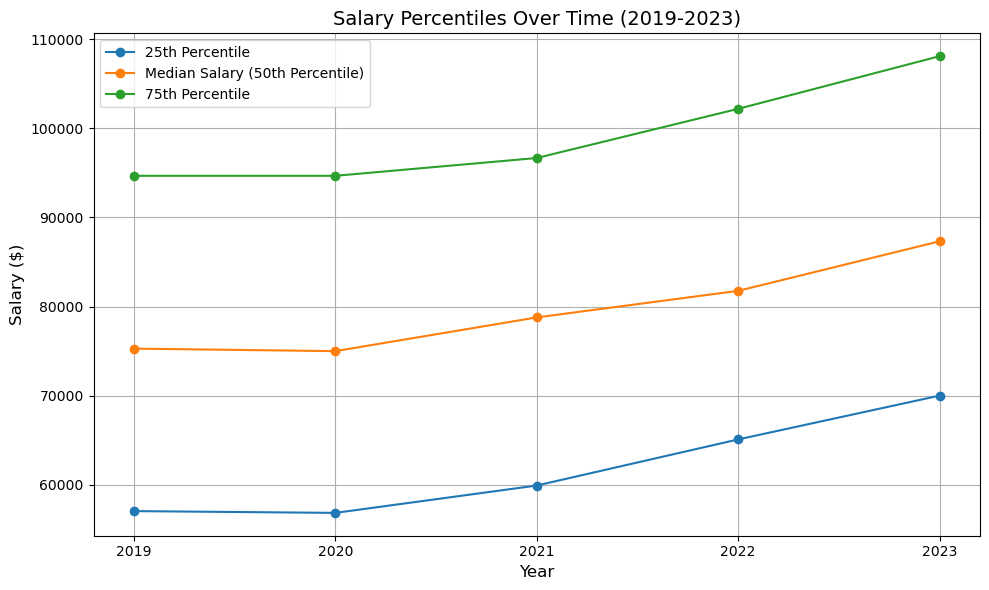

In [21]:
import matplotlib.pyplot as plt

# Plot salary percentiles over time
plt.figure(figsize=(10, 6))

plt.plot(salary_statistics_df['year'], salary_statistics_df['25th_percentile'], label='25th Percentile', marker='o')
plt.plot(salary_statistics_df['year'], salary_statistics_df['median_salary'], label='Median Salary (50th Percentile)', marker='o')
plt.plot(salary_statistics_df['year'], salary_statistics_df['75th_percentile'], label='75th Percentile', marker='o')

plt.title('Salary Percentiles Over Time (2019-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.xticks(salary_statistics_df['year'], rotation=0)  # Set year ticks to integers
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the updated plot
plt.show()


### Line plot showing the ratio of salary growth to inflation for each year
Values above 1 indicate salary growth outpacing inflation, and values below 1 indicate the opposite.

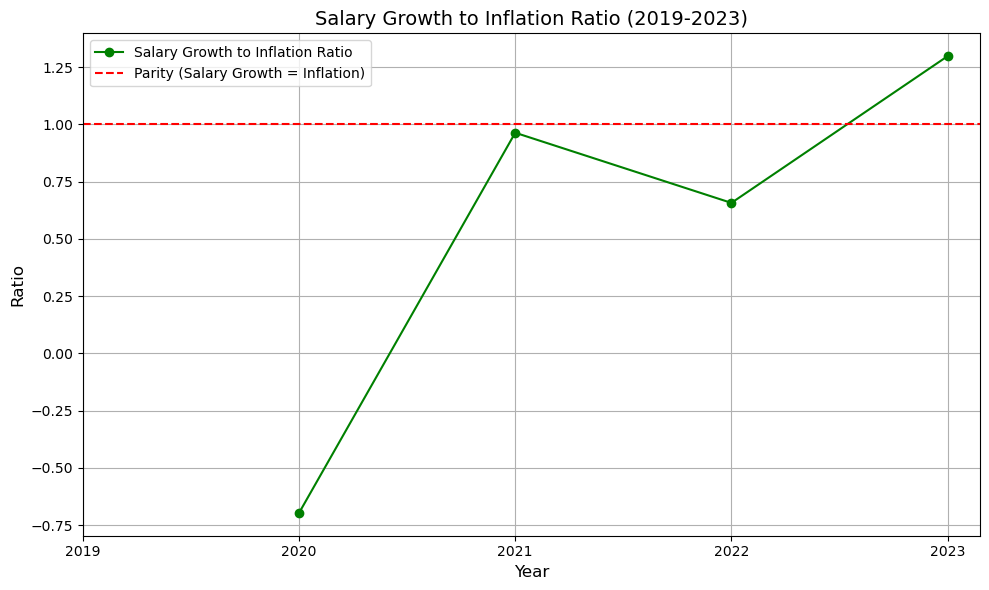

In [23]:
# Plot the ratio of salary growth to inflation
merged_data["salary_to_inflation_ratio"] = merged_data["avg_salary_change"] / merged_data["inflation_rate"]
plt.figure(figsize=(10, 6))
plt.plot(
    merged_data["year"],
    merged_data["salary_to_inflation_ratio"],
    marker="o",
    color="green",
    label="Salary Growth to Inflation Ratio",
)
plt.axhline(1, color="red", linestyle="--", label="Parity (Salary Growth = Inflation)")
plt.title("Salary Growth to Inflation Ratio (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.xticks(merged_data["year"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**
In 2020, the ratio was negative, indicating that salary growth not only lagged inflation but also declined, significantly eroding purchasing power. By 2021, the ratio almost reached parity (1), meaning salary growth was about to match inflation and stabilized earnings. However, in 2022, the ratio dropped below parity, indicating that inflation outpaced salary growth, slightly reducing purchasing power again. In 2023, the ratio exceeded 1, showing that salary growth finally outpaced inflation, marking a significant improvement in purchasing power for employees.

### Boxplots of salaries for each year

The horizontal lines represent for the first year, the average salary and for the subsequent years, the first year's average salary adjusted by cumulative inflation up to that year.

In [26]:
# Standardize column names for salary datasets
standardized_data = {}

for year, df in data_updated.items():
    # Uniform column renaming to avoid discrepancies
    df = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"))
    
    # Ensuring uniformity in key columns
    standardized_data[year] = df.rename(columns={
        "base_salary": "base_salary",
        "overtime_pay": "overtime_pay",
        "longevity_pay": "longevity_pay",
        "department_name": "department_name"
    })

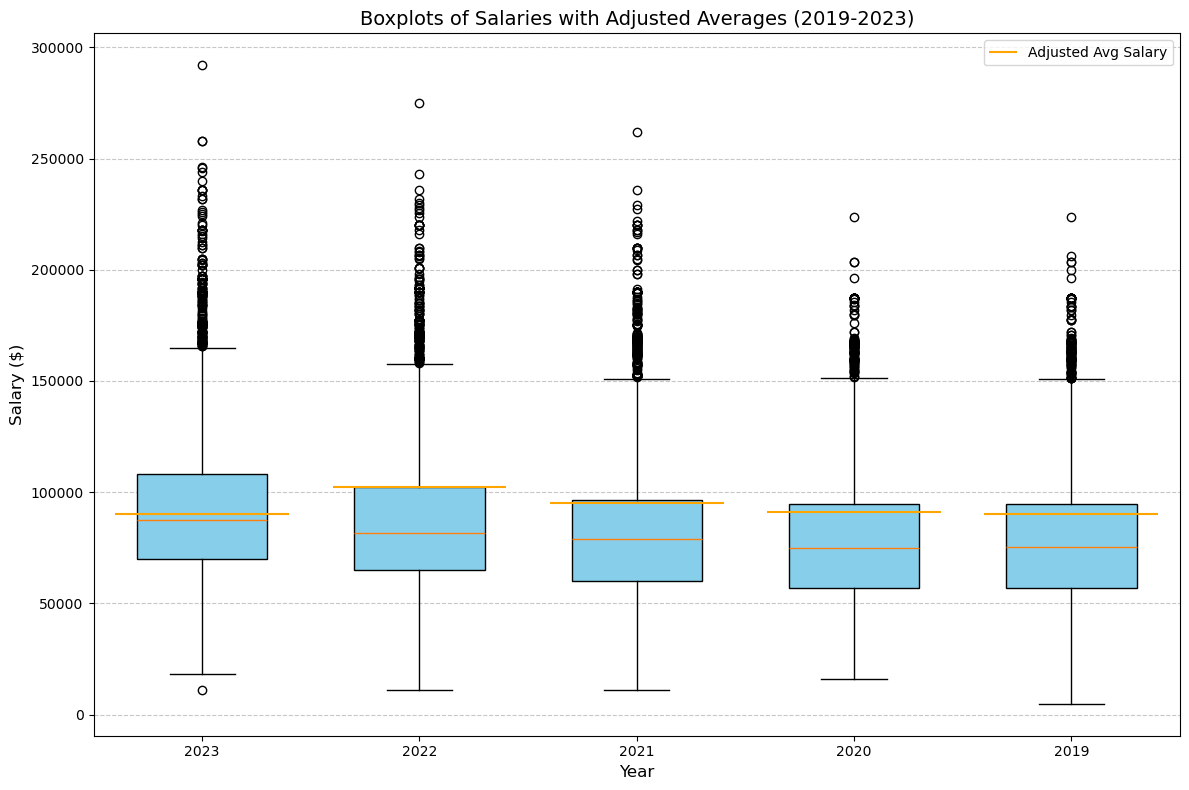

In [27]:
# Filter out invalid keys like 'index' from standardized_data
valid_keys = [key for key in standardized_data.keys() if str(key).split("_")[-1].isdigit()]
valid_years = [int(str(key).split("_")[-1]) for key in valid_keys]

# Boxplots of salaries with adjusted horizontal lines
plt.figure(figsize=(12, 8))

for i, key in enumerate(valid_keys):
    year = valid_years[i]  # Extract the valid year
    salaries = standardized_data[key]["base_salary"].dropna()
    
    adjusted_average = merged_data.loc[merged_data["year"] == year, "average_salary"].values[0]
    
    if i == 0:
        reference_average = adjusted_average
    else:
        inflation_factor = merged_data.loc[merged_data["year"] == year, "average_cpi"].values[0] / merged_data["average_cpi"].iloc[0]
        adjusted_average = reference_average * inflation_factor

    plt.boxplot(
        salaries,
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
    )
    plt.hlines(adjusted_average, i - 0.4, i + 0.4, colors="orange", label="Adjusted Avg Salary" if i == 0 else "")

# Update x-axis labels with valid years
plt.xticks(range(len(valid_years)), valid_years)
plt.title("Boxplots of Salaries with Adjusted Averages (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


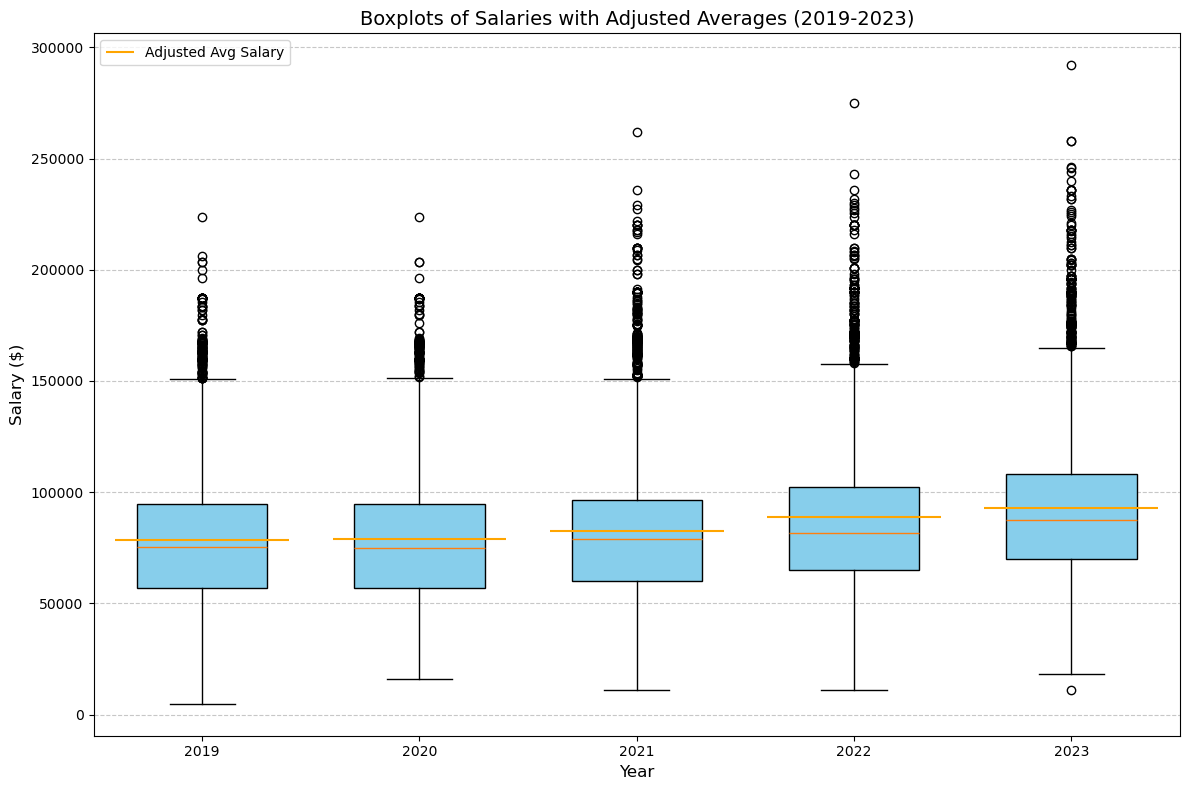

In [28]:
# Sort valid years and keys
valid_keys_sorted = [key for _, key in sorted(zip(valid_years, valid_keys))]
valid_years_sorted = sorted(valid_years)

# Boxplots of salaries with adjusted horizontal lines
plt.figure(figsize=(12, 8))

for i, key in enumerate(valid_keys_sorted):
    year = valid_years_sorted[i]  # Use sorted years
    salaries = standardized_data[key]["base_salary"].dropna()

    adjusted_average = merged_data.loc[merged_data["year"] == year, "average_salary"].values[0]

    if i == 0:
        reference_average = adjusted_average
    else:
        inflation_factor = merged_data.loc[merged_data["year"] == year, "average_cpi"].values[0] / merged_data["average_cpi"].iloc[0]
        adjusted_average = reference_average * inflation_factor

    plt.boxplot(
        salaries,
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
    )
    plt.hlines(adjusted_average, i - 0.4, i + 0.4, colors="orange", label="Adjusted Avg Salary" if i == 0 else "")

# Update x-axis labels with sorted years
plt.xticks(range(len(valid_years_sorted)), valid_years_sorted)
plt.title("Boxplots of Salaries with Adjusted Averages (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**Observations**
The boxplot shows salary distributions from 2019 to 2023, with steady increases in median salaries and adjusted averages (orange lines), indicating consistent salary growth over time. The interquartile range (IQR) slightly widens, suggesting growing variability in salaries, while outliers remain consistent, representing higher earners in specialized or leadership roles. Adjusted averages rise each year, reflecting efforts to align salaries with inflation. By 2023, salaries exhibit the highest medians and adjusted averages, highlighting a positive upward trend, though the widening distribution may point to increasing income inequality.

### Analyzing the salary trends using the ECI

In the previous analysis, I only used the Consumer Price Index (CPI) for calculating inflation rates and comparing them with salary growth. The Employment Cost Index (ECI) was not included in the analysis. 

In [31]:
# Filter relevant rows and columns for ECI data
eci_filtered = employment_cost_df.copy()  # Make an explicit copy
eci_filtered.columns = ["Year", "Period", "ECI"]  # Rename columns
eci_filtered = eci_filtered[["Year", "ECI"]]  # Retain necessary columns

# Convert Year and ECI columns to numeric
eci_filtered["Year"] = pd.to_numeric(eci_filtered["Year"], errors="coerce")
eci_filtered["ECI"] = pd.to_numeric(eci_filtered["ECI"], errors="coerce")

# Drop rows with NaN values
eci_filtered = eci_filtered.dropna().reset_index(drop=True)  # Reset index after dropping NaNs

# Calculate yearly average ECI
eci_yearly = eci_filtered.groupby("Year", as_index=False)["ECI"].mean()

# Filter for years 2019-2023
eci_yearly = eci_yearly[(eci_yearly["Year"] >= 2019) & (eci_yearly["Year"] <= 2023)].copy()

# Calculate year-over-year percent change in ECI
eci_yearly["eci_change"] = eci_yearly["ECI"].pct_change()

# Merge ECI data with salary statistics
merged_data_eci = pd.merge(
    salary_statistics_df, eci_yearly, left_on="year", right_on="Year", how="left"
)

# Display the cleaned ECI data and the merged dataset
eci_yearly.head(), merged_data_eci.head()


(   Year      ECI  eci_change
 5  2019  136.850         NaN
 6  2020  140.450    0.026306
 7  2021  145.475    0.035778
 8  2022  152.975    0.051555
 9  2023  159.700    0.043961,
    year  average_salary  25th_percentile  median_salary  75th_percentile  \
 0  2019    78495.193200         57071.00      75290.000          94668.0   
 1  2020    78052.895838         56870.26      75007.375          94668.0   
 2  2021    81339.530378         59939.00      78789.380          96665.0   
 3  2022    85503.279209         65109.00      81770.000         102180.0   
 4  2023    90312.165744         70023.00      87328.000         108084.0   
 
    avg_salary_change  25th_change  median_change  75th_change  Year      ECI  \
 0                NaN          NaN            NaN          NaN  2019  136.850   
 1          -0.005635    -0.003517      -0.003754     0.000000  2020  140.450   
 2           0.042108     0.053960       0.050422     0.021095  2021  145.475   
 3           0.051190     0.086

The table provides a comparison between salary changes (average, 25th, median, and 75th percentiles) and the Employment Cost Index (ECI) changes from 2019 to 2023. The ECI, representing labor cost growth, consistently increases year-over-year, with the highest change of 5.16% in 2022. However, salary growth, while positive from 2021 onwards, varies by percentile. The 25th percentile experienced the highest growth in 2022 (8.63%), indicating a focus on improving lower-income employee salaries. Median and 75th percentiles show steady but smaller increases, suggesting more moderate adjustments for middle- and high-income earners. Overall, salary growth outpaced ECI in 2021 and 2023, reflecting improvements in employee compensation relative to labor cost inflation. However, the negative growth in 2020 highlights the challenges of that year probably due to the COVID.

#### Compare ECI and CPI Year-Over-Year Changes

In [34]:
# Merge CPI and ECI changes into a single dataset for comparison
cpi_change = consumer_price_index_cleaned.rename(columns={"average_cpi": "cpi"})
cpi_change["cpi_change"] = cpi_change["cpi"].pct_change()

comparison_data = pd.merge(
    eci_yearly[["Year", "eci_change"]].rename(columns={"Year": "year"}),
    cpi_change[["year", "cpi_change"]],
    on="year",
    how="inner"
)

# Calculate the difference between ECI and CPI changes
comparison_data["difference"] = comparison_data["eci_change"] - comparison_data["cpi_change"]

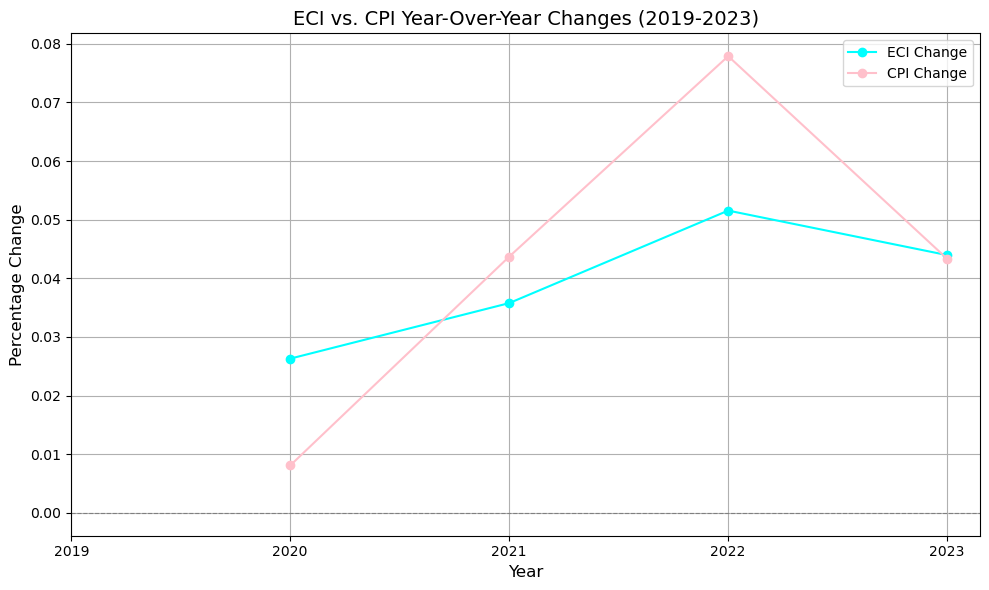

In [35]:
# Plot trends for ECI and CPI percentage changes
plt.figure(figsize=(10, 6))
plt.plot(comparison_data["year"], comparison_data["eci_change"], label="ECI Change", marker="o", color= "cyan")
plt.plot(comparison_data["year"], comparison_data["cpi_change"], label="CPI Change", marker="o", color = "pink")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("ECI vs. CPI Year-Over-Year Changes (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.xticks(comparison_data["year"].astype(int), rotation=0)  # Remove decimals in year ticks
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation**
The chart compares the year-over-year percentage changes in the Employment Cost Index (ECI) and the Consumer Price Index (CPI) from 2019 to 2023. In 2020, both ECI and CPI experienced modest increases, with ECI rising by about 2.63% and CPI increasing slightly less, reflecting minimal economic growth and inflation. In 2021, CPI surged to 4.37%, significantly outpacing ECI's growth of 3.58%, indicating a sharp rise in consumer prices that labor costs did not fully match, potentially eroding purchasing power. By 2022, CPI peaked at 7.79%, far exceeding ECI's 5.16%, showcasing a significant inflation spike that outpaced wage increases, leading to heightened financial pressures for workers. In 2023, both CPI and ECI growth slowed, with CPI dropping to 4.33% and ECI at 4.40%, signaling a stabilization where labor costs finally aligned with inflation trends. Overall, the chart highlights that while labor costs (ECI) consistently grew, inflation (CPI) significantly outpaced it in 2021 and 2022, impacting purchasing power. By 2023, ECI growth matched CPI, reflecting improved balance between wages and inflation. This trend suggests economic recovery and stabilization following the inflationary pressures of 2021-2022.

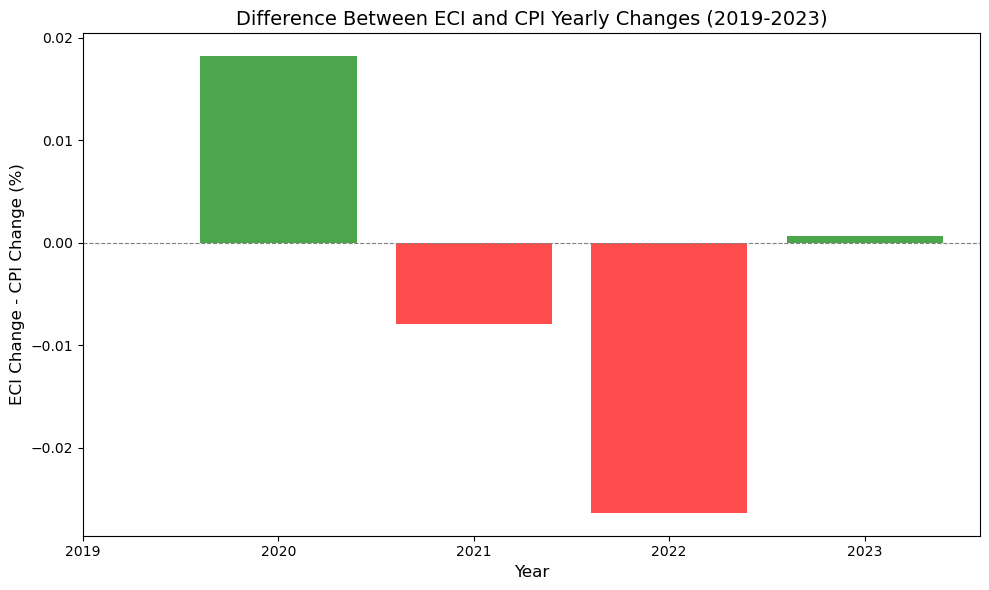

In [37]:
# Plot the difference between ECI and CPI changes
plt.figure(figsize=(10, 6))
plt.bar(
    comparison_data["year"].astype(int),
    comparison_data["difference"],
    color=["green" if val > 0 else "red" for val in comparison_data["difference"]],
    alpha=0.7,
)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Difference Between ECI and CPI Yearly Changes (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ECI Change - CPI Change (%)", fontsize=12)
plt.xticks(comparison_data["year"].astype(int), rotation=0)  # Remove decimals in year ticks
plt.tight_layout()
plt.show()


**Interpretation**
The bar chart depicts the difference between Employment Cost Index (ECI) and Consumer Price Index (CPI) yearly percentage changes from 2019 to 2023, highlighting how wage growth (ECI) compares to inflation (CPI). In 2020, a positive difference indicates that ECI growth (+2.63%) outpaced CPI growth (+0.81%), suggesting wages increased faster than inflation, improving purchasing power for workers. In 2021 and 2022, negative differences reflect periods where CPI significantly outpaced ECI. In 2021, inflation surged, with CPI growth (+4.37%) exceeding ECI growth (+3.58%), eroding workers' purchasing power. In 2022, the gap widened further as CPI (+7.79%) far surpassed ECI (+5.16%), intensifying financial strain for employees. In 2023, the difference is nearly zero, signaling alignment between ECI (+4.40%) and CPI (+4.33%). This stabilization suggests wage growth is finally keeping pace with inflation, maintaining purchasing power. Overall, the chart reveals that 2020 was the only year where wage growth outpaced inflation, while 2021 and 2022 highlighted inflationary pressures eroding real wages. By 2023, wages and inflation were balanced, indicating economic stabilization. This underscores the need for sustained wage growth to mitigate the impact of high inflation during volatile periods.


#### Comparing Salary Growth to ECI Changes

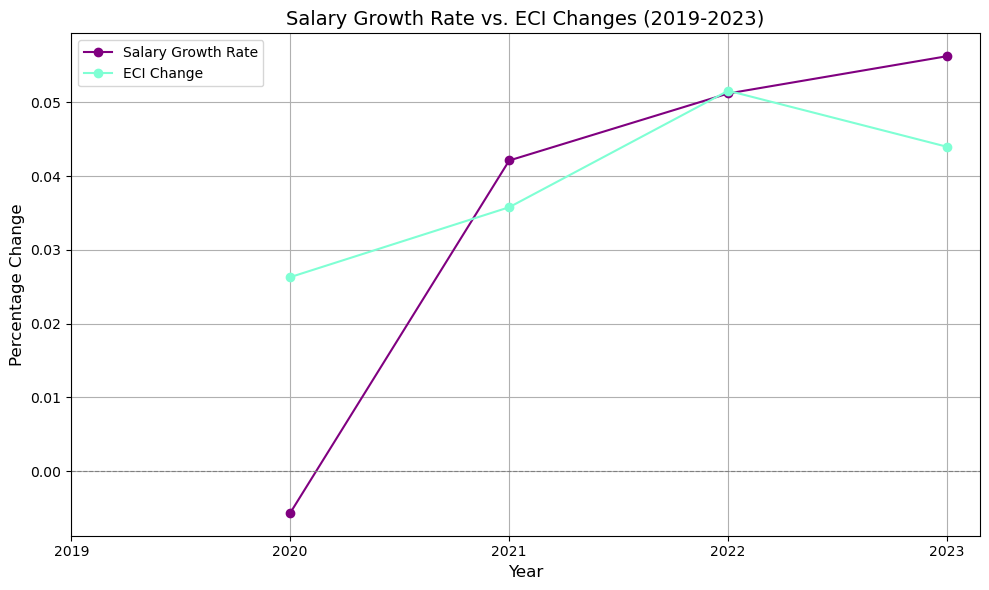

In [40]:
# Calculate the ratio of salary growth to ECI change
merged_data_eci["salary_to_eci_ratio"] = merged_data_eci["avg_salary_change"] / merged_data_eci["eci_change"]

# Plot salary growth vs. ECI changes
plt.figure(figsize=(10, 6))
plt.plot(
    merged_data_eci["year"],
    merged_data_eci["avg_salary_change"],
    label="Salary Growth Rate",
    marker="o", color = "purple"
)
plt.plot(
    merged_data_eci["year"],
    merged_data_eci["eci_change"],
    label="ECI Change",
    marker="o", color = "aquamarine"
)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Salary Growth Rate vs. ECI Changes (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.xticks(merged_data_eci["year"].astype(int), rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The chart compares the salary growth rate and Employment Cost Index (ECI) changes from 2019 to 2023, highlighting how employee salaries align with labor cost trends over time. In 2020, salary growth was negative, reflecting a decline in employee compensation, while ECI grew slightly, suggesting that labor costs increased but salaries did not keep pace. In 2021, salary growth rebounded sharply, surpassing ECI growth for the first time, indicating efforts to improve wages after the downturn in 2020. By 2022, salary growth and ECI were closely aligned, with both increasing at a similar rate, reflecting a period where wage adjustments kept pace with rising labor costs. In 2023, salary growth exceeded ECI growth, suggesting that employee compensation improved at a faster rate than labor costs, benefiting workers and increasing their purchasing power. Overall, the chart illustrates the recovery of salary growth after the 2020 decline, with consistent alignment or outperformance relative to ECI from 2021 to 2023. The outperformance in 2023 highlights a positive trend for employee wages exceeding broader labor cost increases, which may reflect targeted efforts to address previous gaps in wage growth.

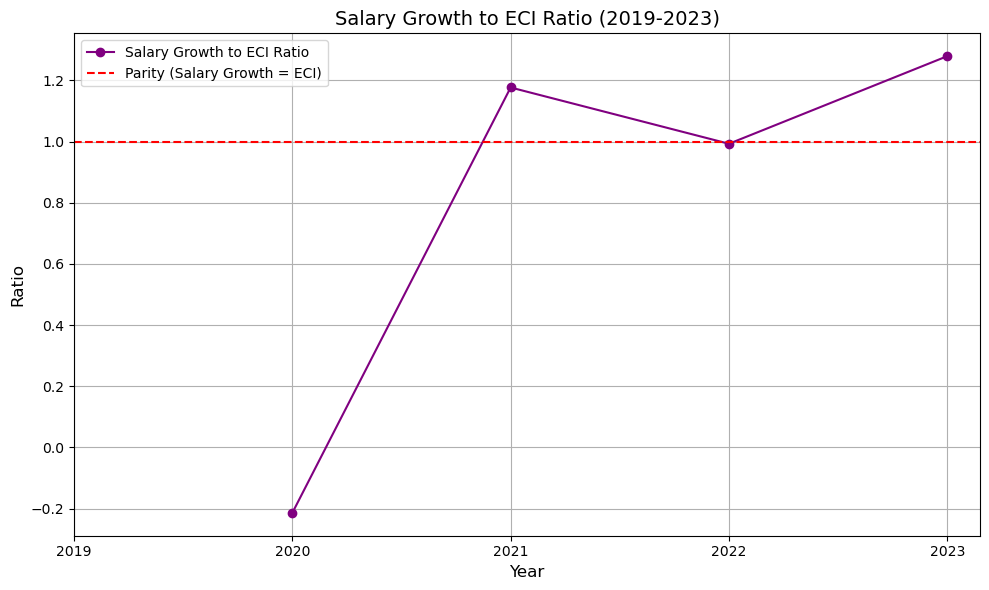

In [42]:
# Plot the ratio of salary growth to ECI changes
plt.figure(figsize=(10, 6))
plt.plot(
    merged_data_eci["year"],
    merged_data_eci["salary_to_eci_ratio"],
    label="Salary Growth to ECI Ratio",
    marker="o",
    color="purple",
)
plt.axhline(1, color="red", linestyle="--", label="Parity (Salary Growth = ECI)")
plt.title("Salary Growth to ECI Ratio (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.xticks(merged_data_eci["year"].astype(int), rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The chart depicts the ratio of salary growth to Employment Cost Index (ECI) changes from 2019 to 2023, with a parity line (ratio = 1) representing equal growth between salaries and ECI. In 2020, the ratio is negative, indicating that salary growth declined while ECI increased. This highlights a year where employees faced significant challenges, with wages not keeping pace with rising labor costs. In 2021, the ratio rises sharply above parity (close to 1.2), showing that salary growth outpaced ECI. This reflects a strong recovery effort to improve wages after the decline in 2020. By 2022, the ratio returns to parity (1), meaning salary growth aligned closely with ECI changes, signaling stabilization where wages kept pace with labor costs. In 2023, the ratio climbs slightly above 1 again, indicating that salary growth exceeded ECI. This suggests further improvements in wages, benefiting employees more than in previous years. Overall, the chart demonstrates a recovery from the salary decline in 2020, with wages consistently aligning with or outpacing labor costs in subsequent years. The upward trend in 2023 suggests a positive trajectory for employee compensation relative to ECI, indicating improving conditions for workers, particularly after the challenges of 2020.

## Departmental Analysis

The aim is to investigate how salary growth differs between departments.
I will group the data by department_name representing regions

In [45]:
# Calculate regional salary growth by department_name
regional_salary_growth = []

for year, data in standardized_data.items():
    # Ensure the key contains a valid year
    if not str(year).split("_")[-1].isdigit():
        continue  # Skip invalid keys like 'index'
    
    extracted_year = int(str(year).split("_")[-1])  # Extract and convert the year
    
    avg_salary_by_region = data.groupby("department_name")["base_salary"].mean().reset_index()
    avg_salary_by_region = avg_salary_by_region.rename(columns={"base_salary": "average_salary"})
    avg_salary_by_region["year"] = extracted_year
    regional_salary_growth.append(avg_salary_by_region)

# Combine data across years
regional_salary_growth_df = pd.concat(regional_salary_growth, ignore_index=True)

# Calculate year-over-year growth by region
regional_salary_growth_df = regional_salary_growth_df.sort_values(by=["department_name", "year"])
regional_salary_growth_df["salary_growth"] = regional_salary_growth_df.groupby("department_name")[
    "average_salary"
].pct_change()

# Filter data to exclude NaN growth (first year for each region)
regional_salary_growth_filtered = regional_salary_growth_df.dropna(subset=["salary_growth"])


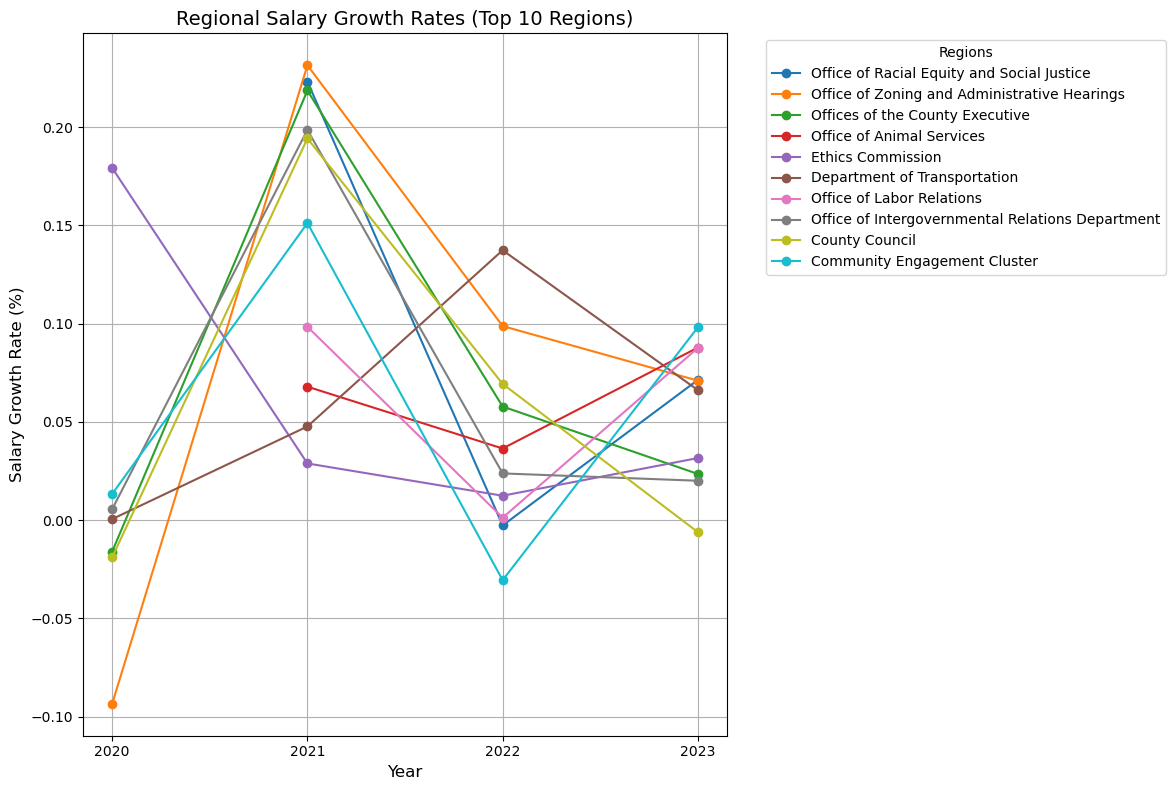

In [46]:

# Visualize salary growth regionally (top regions by growth)
top_regions = regional_salary_growth_filtered.groupby("department_name")["salary_growth"].mean().nlargest(10).index

plt.figure(figsize=(12, 8))
for region in top_regions:
    region_data = regional_salary_growth_filtered[regional_salary_growth_filtered["department_name"] == region]
    plt.plot(
        region_data["year"],
        region_data["salary_growth"],
        marker="o",
        label=region,
    )

plt.title("Regional Salary Growth Rates (Top 10 Regions)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary Growth Rate (%)", fontsize=12)
plt.xticks(regional_salary_growth_filtered["year"].unique().astype(int), rotation=0)
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

Since the line chart is not easy to interpret for those outside of the technical field, I will generate a visualization that is readable for all.

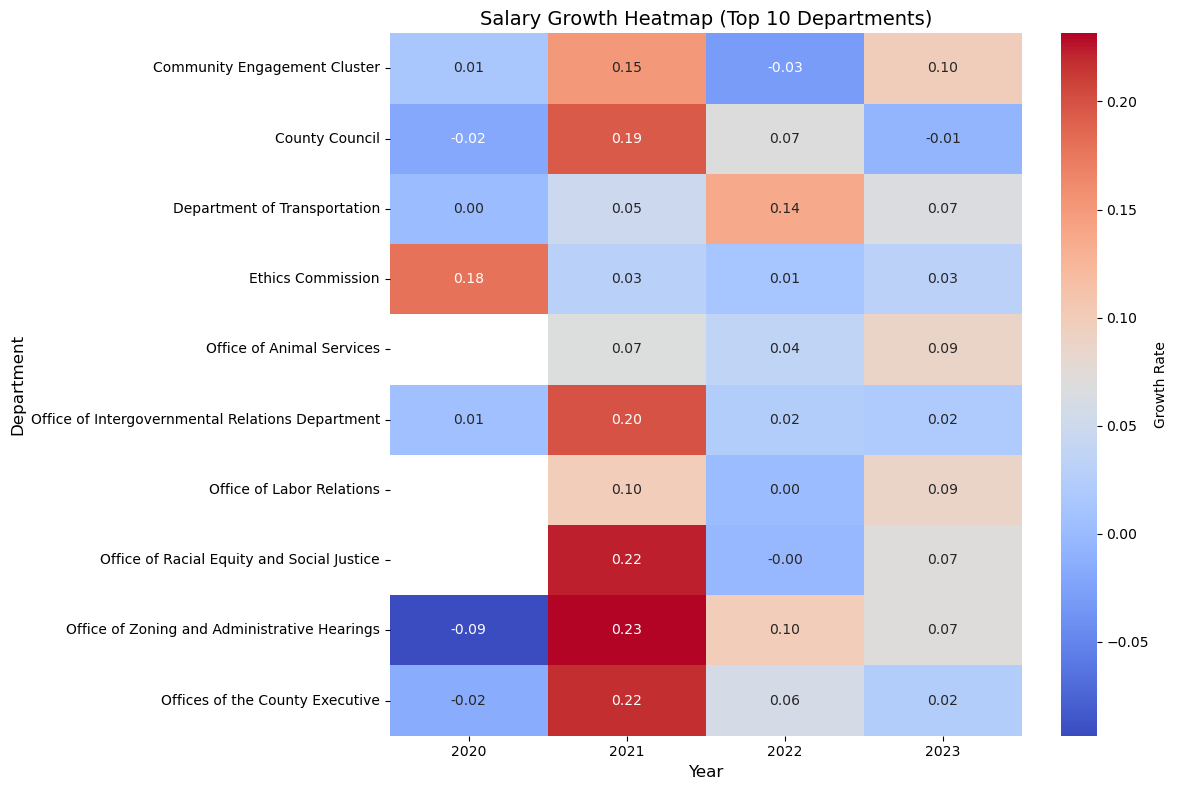

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap: Salary growth rates by department and year (top regions by growth)
top_regions = regional_salary_growth_filtered.groupby("department_name")["salary_growth"].mean().nlargest(10).index
avg_growth_top_regions = regional_salary_growth_filtered[
    regional_salary_growth_filtered["department_name"].isin(top_regions)
]
avg_growth_by_region = (
    avg_growth_top_regions.groupby("department_name")["salary_growth"].mean().reset_index()
)

# Correct pivot statement
heatmap_data = avg_growth_top_regions.pivot(index="department_name", columns="year", values="salary_growth")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Growth Rate"}
)
plt.title("Salary Growth Heatmap (Top 10 Departments)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()
plt.show()


**Observations**
    The heatmap visualizes salary growth rates across different departments from 2020 to 2023. Positive growth rates are represented in warmer colors (orange/red), while negative growth rates are shown in cooler colors (blue). 
    Departments with consistent growth, such as the Office of Intergovernmental Relations Department and the Office of Labor Relations, showed relatively stable and positive growth rates across most years, indicating consistent improvements in salaries. High growth periods were observed in the Office of Racial Equity and Social Justice and the Office of Zoning and Administrative Hearings, which experienced sharp growth in 2021, with growth rates of 22% and 23%, respectively. The County Council also had significant growth in 2021 (19%). 
    Declining growth was seen in the Community Engagement Cluster and County Council, which saw negative growth in 2023 and 2020, respectively, indicating a decline in average salaries for those years. The Office of Racial Equity and Social Justice experienced a notable decline in 2023 (-0.07), suggesting a reversal of the significant growth seen in 2021. Departments with minimal changes, such as the Department of Transportation and the Ethics Commission, showed moderate but steady growth over the years, with no significant fluctuations. 
    Overall, the heatmap highlights disparities in salary growth across departments and years. Some departments, such as the Office of Zoning and Administrative Hearings, experienced sharp increases in certain years, while others, like the Community Engagement Cluster, faced more variability and occasional declines. This visualization reflects uneven salary adjustments, which may be tied to specific departmental policies or budgetary constraints.

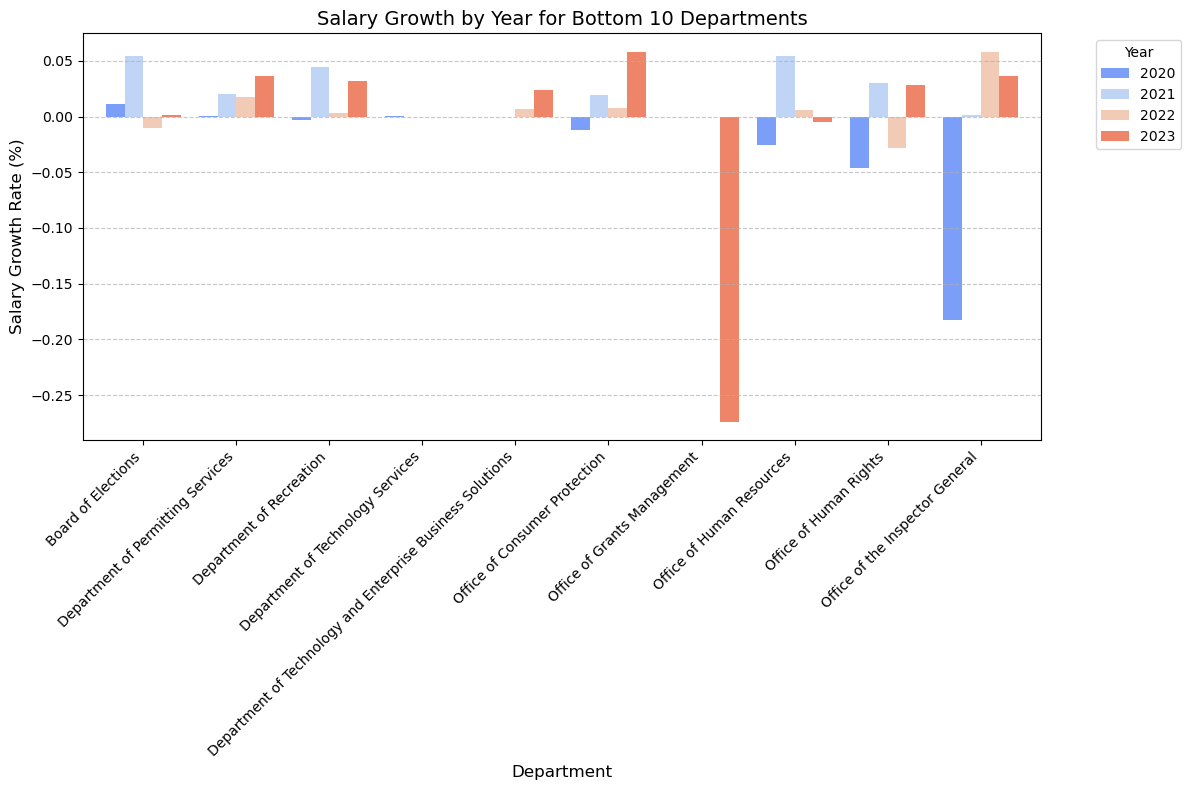

In [50]:
# Identify departments with the lowest average salary growth
lowest_regions = (
    regional_salary_growth_filtered.groupby("department_name")["salary_growth"]
    .mean()
    .nsmallest(10)
    .index
)

# Filter data for these regions
lowest_growth_data = regional_salary_growth_filtered[
    regional_salary_growth_filtered["department_name"].isin(lowest_regions)
]

# Plot lowest salary growth regions as a grouped bar chart
grouped_lowest_data = lowest_growth_data.pivot(
    index="department_name", columns="year", values="salary_growth"
)

grouped_lowest_data.plot(kind="bar", figsize=(12, 8), width=0.8, color=sns.color_palette("coolwarm", len(grouped_lowest_data.columns)))
plt.title("Salary Growth by Year for Bottom 10 Departments", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Salary Growth Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The grouped bar chart shows salary growth rates for the bottom 10 departments by year from 2020 to 2023, with positive growth rates indicated above the x-axis and negative rates below. Key insights reveal that the Office of Grants Management experienced the most significant negative growth in 2023, dropping by over 25%, and the Office of Human Resources saw a substantial decrease in 2020, highlighting challenging periods for salaries in these departments. Departments like the Board of Elections and Office of the Inspector General exhibited fluctuating salary growth, suggesting irregular salary adjustments. In contrast, the Department of Technology and Enterprise Business Solutions and the Office of Consumer Protection maintained modest positive growth, indicating relatively stable salary performance and resilience. Overall, negative growth dominates the highlighted departments, with only a few instances of strong positive growth, suggesting persistent challenges in salary increases. This underscores the need for more uniform strategies to address salary disparities in underperforming departments.

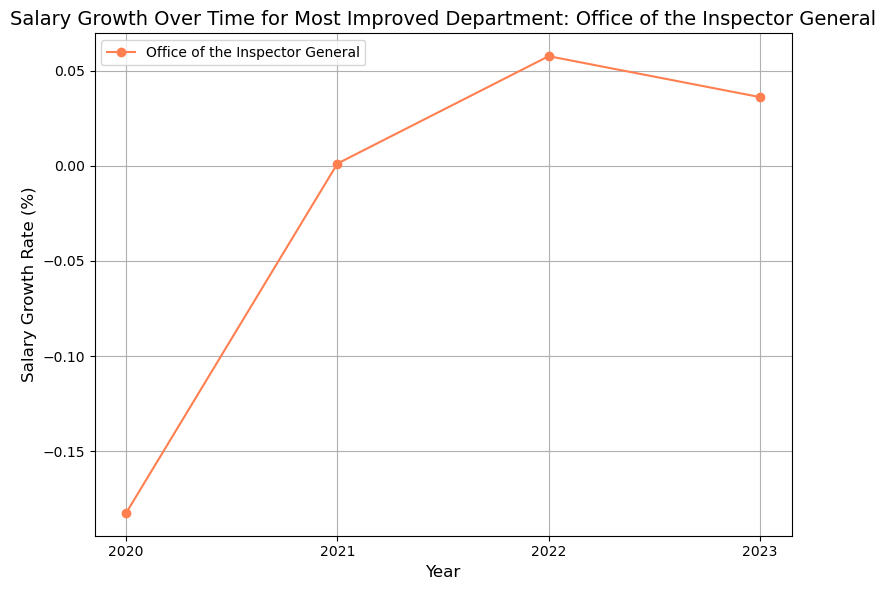

In [52]:
# Calculate improvement as the change in salary growth from the first to the last year
department_improvement = regional_salary_growth_filtered.groupby("department_name").agg(
    initial_growth=("salary_growth", "first"),
    final_growth=("salary_growth", "last"),
)
department_improvement["growth_improvement"] = (
    department_improvement["final_growth"] - department_improvement["initial_growth"]
)

# Identify the department with the most improvement
most_improved_department = department_improvement["growth_improvement"].idxmax()
most_improved_data = regional_salary_growth_filtered[
    regional_salary_growth_filtered["department_name"] == most_improved_department
]

# Plot salary growth over time for the most improved department
plt.figure(figsize=(8, 6))
plt.plot(
    most_improved_data["year"],
    most_improved_data["salary_growth"],
    marker="o",
    label=most_improved_department,
    color="coral",
)
plt.title(f"Salary Growth Over Time for Most Improved Department: {most_improved_department}", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary Growth Rate (%)", fontsize=12)
plt.xticks(most_improved_data["year"].unique().astype(int), rotation=0)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


The chart shows the salary growth rate for the Office of the Inspector General from 2020 to 2023, highlighting a significant recovery after a sharp decline of approximately -15% in 2020. In 2021, salaries stabilized with a growth rate of 0%, followed by a peak growth of 5% in 2022, demonstrating substantial improvement. While the growth rate slightly decreased in 2023, it remained positive, reflecting continued, albeit slower, progress. Overall, the department recovered strongly from the 2020 downturn, with consistent salary improvements in the following years.

###  Analyzing salary trends by job role using the "division" column (it represents roles)

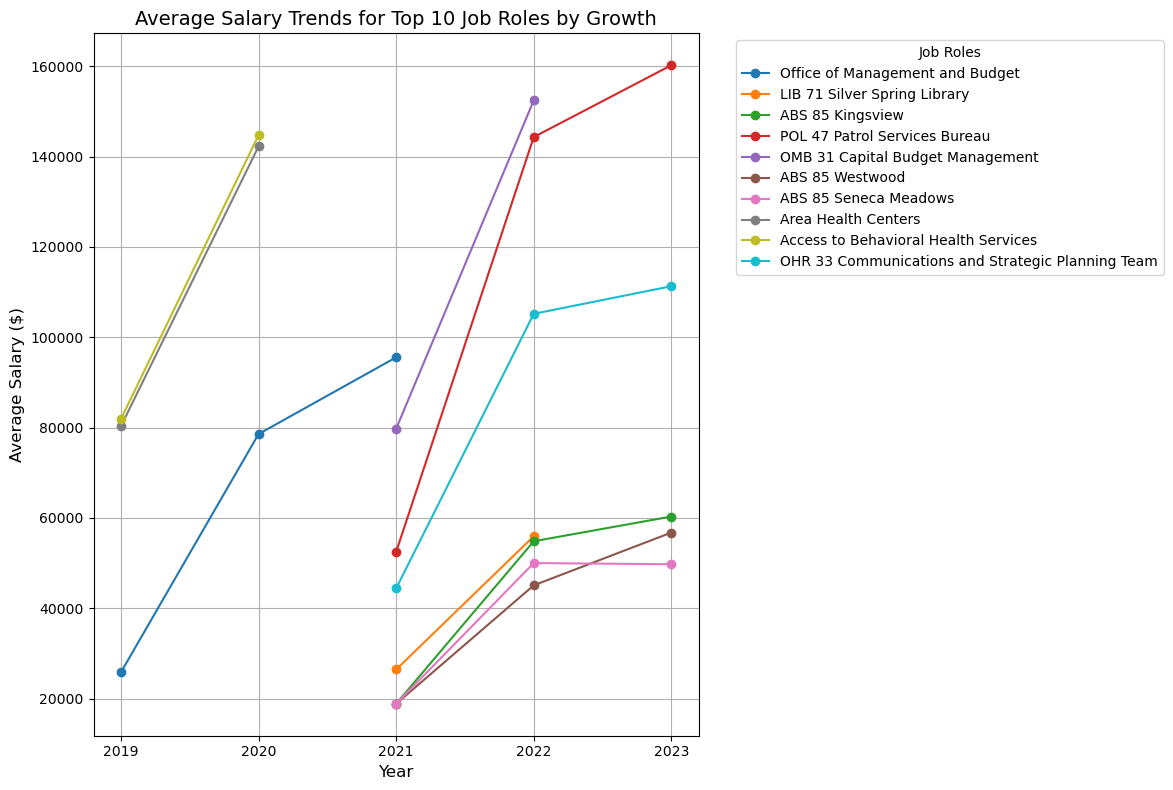

In [55]:
# Calculate average salary and growth by division (job role) for each year
role_salary_trends = []

for year, data in standardized_data.items():
    # Ensure the key contains a valid year
    if not str(year).split("_")[-1].isdigit():
        continue  # Skip invalid keys like 'index'

    numeric_year = int(year.split("_")[-1])  # Extract and convert the year from the key

    role_stats = data.groupby("division").agg(
        average_salary=("base_salary", "mean")
    ).reset_index()
    role_stats["year"] = numeric_year
    role_salary_trends.append(role_stats)

# Combine data across years
role_salary_trends_df = pd.concat(role_salary_trends, ignore_index=True)

# Calculate year-over-year growth in average salary by role
role_salary_trends_df = role_salary_trends_df.sort_values(by=["division", "year"])
role_salary_trends_df["salary_growth"] = role_salary_trends_df.groupby("division")[
    "average_salary"
].pct_change()


# Plot the average salary trends for the top 10 roles by salary growth
top_roles = role_salary_trends_df.groupby("division")["salary_growth"].mean().nlargest(10).index

plt.figure(figsize=(12, 8))
for role in top_roles:
    role_data = role_salary_trends_df[role_salary_trends_df["division"] == role]
    plt.plot(
        role_data["year"],
        role_data["average_salary"],
        marker="o",
        label=role,
    )

plt.title("Average Salary Trends for Top 10 Job Roles by Growth", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.xticks(role_salary_trends_df["year"].unique().astype(int), rotation=0)
plt.legend(title="Job Roles", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


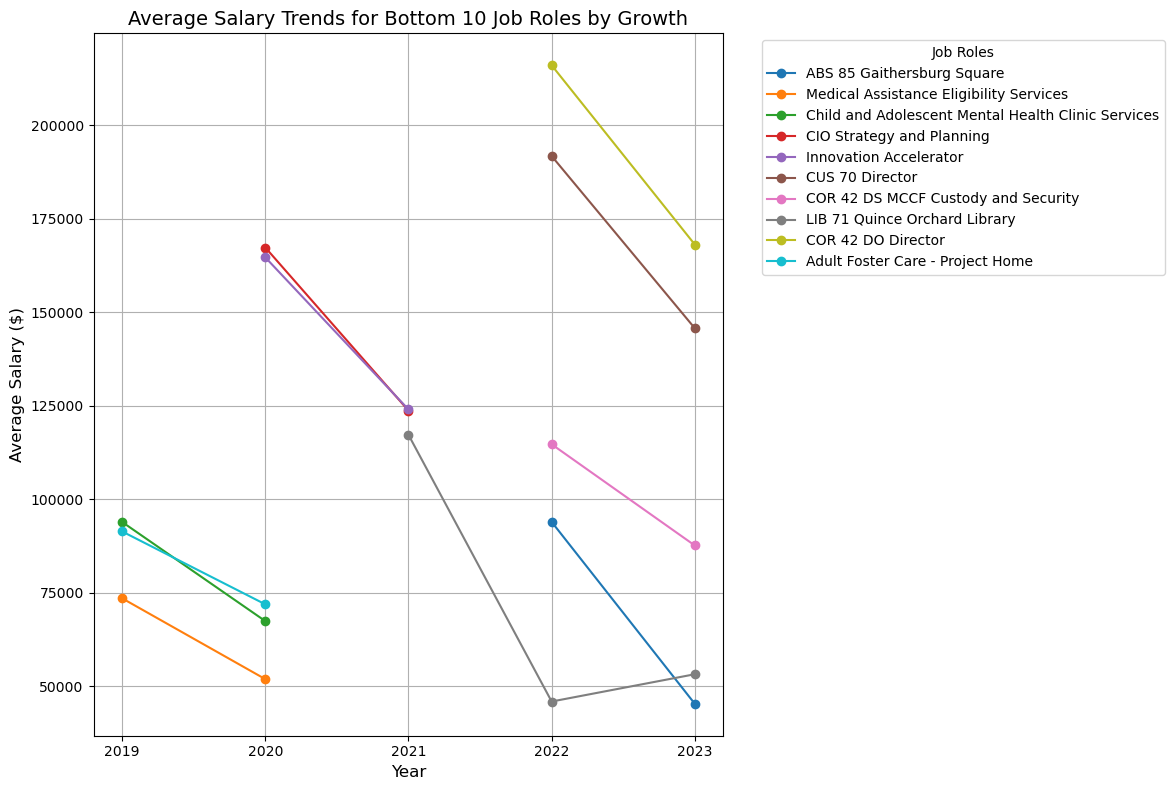

In [56]:
# Calculate average salary and growth by division (job role) for each year
role_salary_trends = []

for year, data in standardized_data.items():
    # Ensure the key contains a valid year
    if not str(year).split("_")[-1].isdigit():
        continue  # Skip invalid keys like 'index'

    numeric_year = int(year.split("_")[-1])  # Extract and convert the year from the key

    role_stats = data.groupby("division").agg(
        average_salary=("base_salary", "mean")
    ).reset_index()
    role_stats["year"] = numeric_year
    role_salary_trends.append(role_stats)

# Combine data across years
role_salary_trends_df = pd.concat(role_salary_trends, ignore_index=True)

# Calculate year-over-year growth in average salary by role
role_salary_trends_df = role_salary_trends_df.sort_values(by=["division", "year"])
role_salary_trends_df["salary_growth"] = role_salary_trends_df.groupby("division")[
    "average_salary"
].pct_change()


# Plot the average salary trends for the top 10 roles by salary growth
top_roles = role_salary_trends_df.groupby("division")["salary_growth"].mean().nsmallest(10).index

plt.figure(figsize=(12, 8))
for role in top_roles:
    role_data = role_salary_trends_df[role_salary_trends_df["division"] == role]
    plt.plot(
        role_data["year"],
        role_data["average_salary"],
        marker="o",
        label=role,
    )

plt.title("Average Salary Trends for Bottom 10 Job Roles by Growth", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.xticks(role_salary_trends_df["year"].unique().astype(int), rotation=0)
plt.legend(title="Job Roles", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


### Salary growth for each department across the years

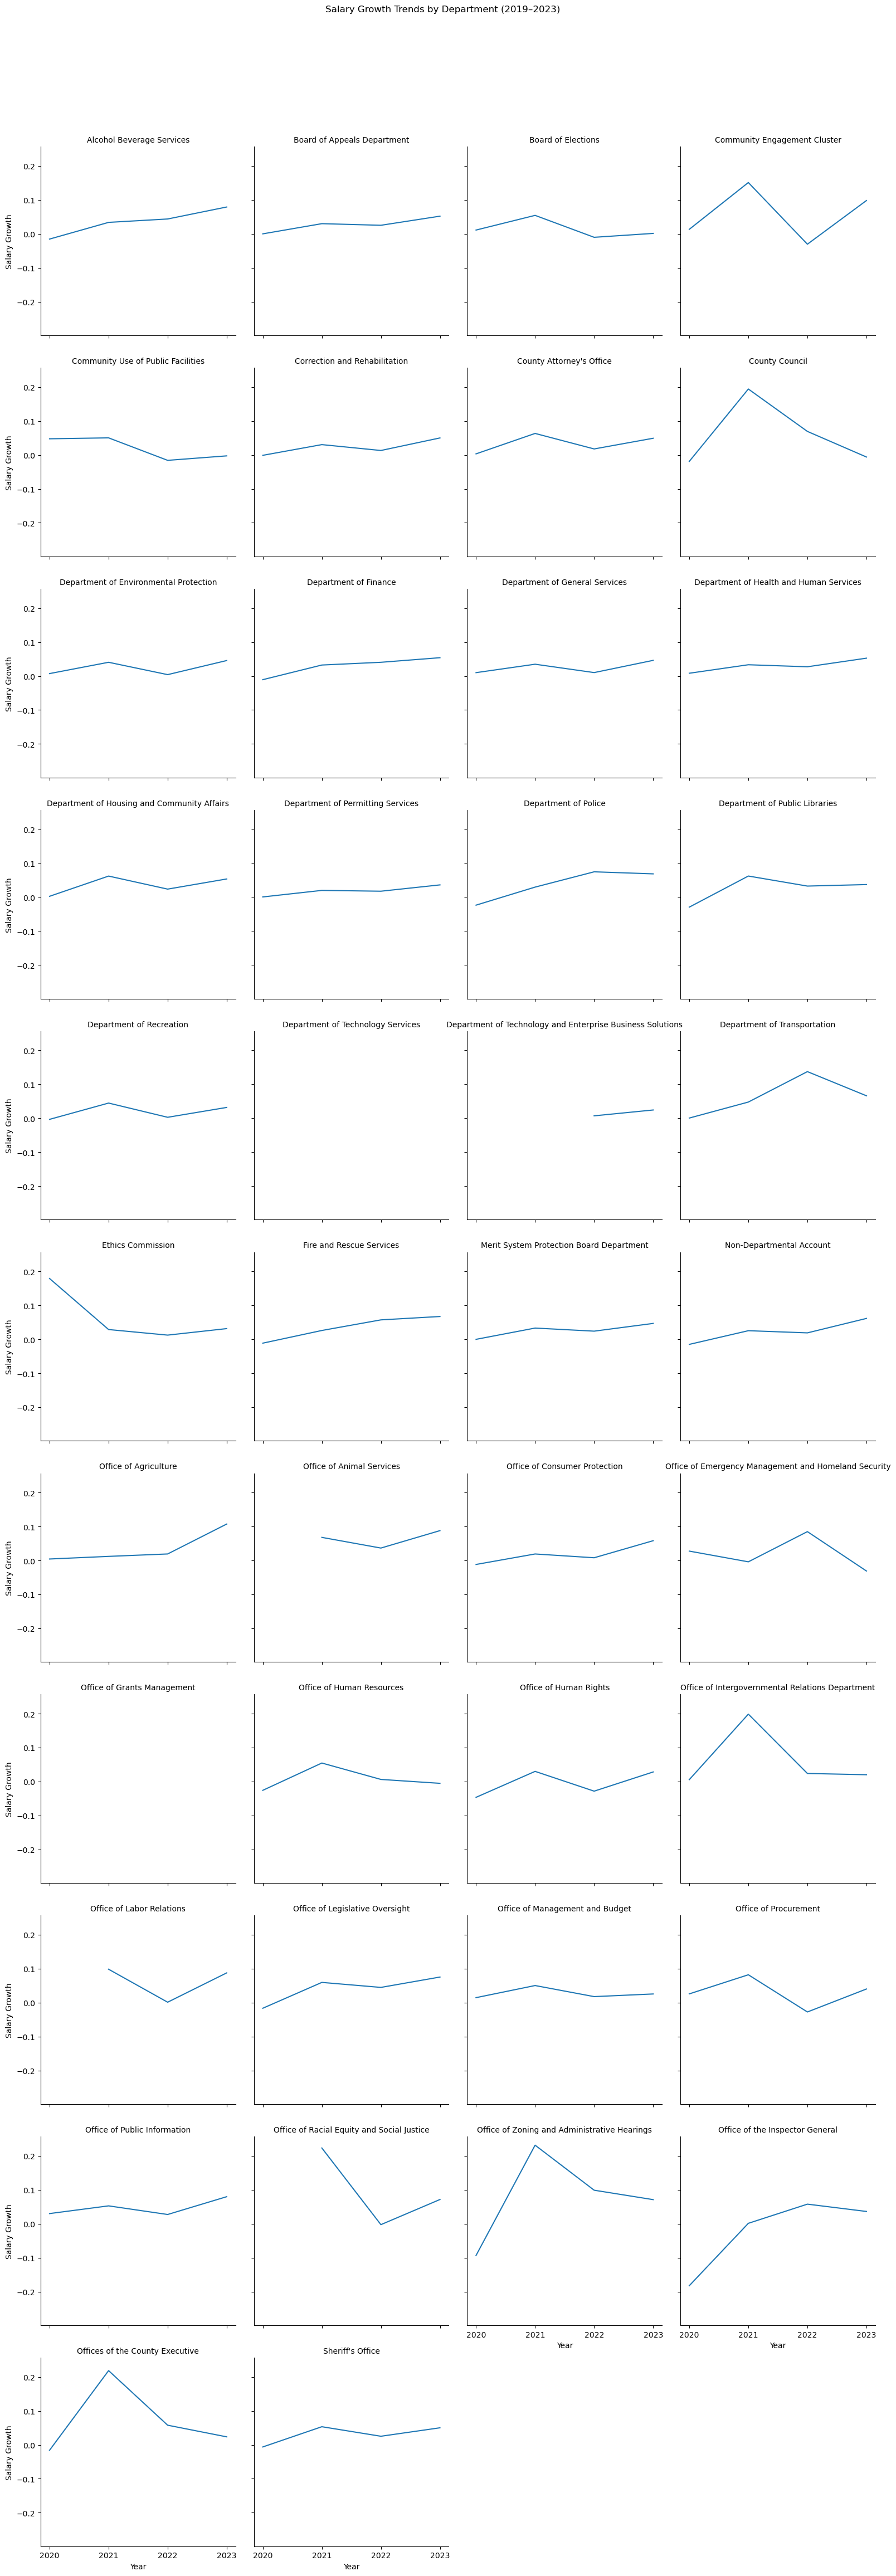

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ensure year is numeric for proper plotting
regional_salary_growth_filtered["year"] = pd.to_numeric(regional_salary_growth_filtered["year"], errors="coerce")

# Facet plot using Seaborn
g = sns.FacetGrid(regional_salary_growth_filtered, col="department_name", col_wrap=4, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="salary_growth")

# Customize axis labels and ticks
g.set_axis_labels("Year", "Salary Growth")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticks(sorted(regional_salary_growth_filtered["year"].unique()))
    ax.set_xticklabels(sorted(regional_salary_growth_filtered["year"].unique()), rotation=0, fontsize=10)

# Add a suptitle
g.fig.suptitle("Salary Growth Trends by Department (2019–2023)", y=1.05)
plt.show()


### Investigate factors influencing salary growth

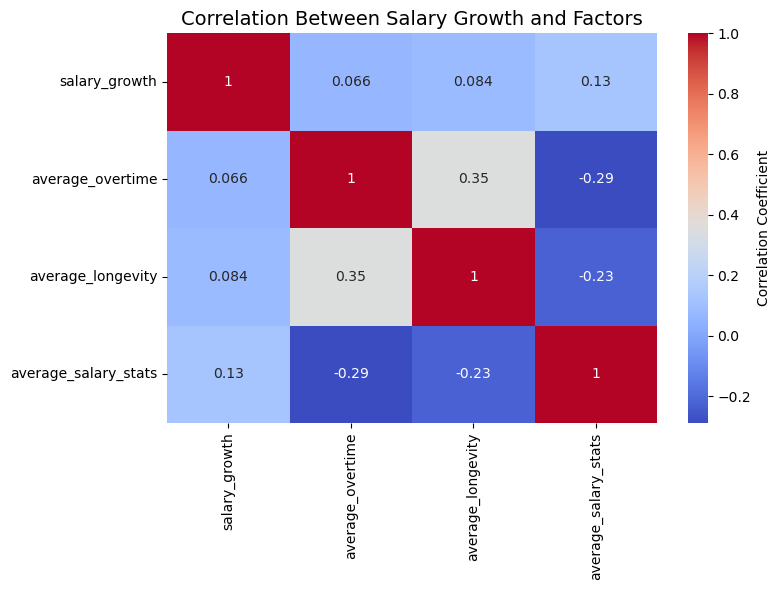

In [67]:
# Normalize column names for overtime and longevity pay
for year, data in standardized_data.items():
    # Skip invalid keys like 'index'
    if not str(year).split("_")[-1].isdigit():
        continue
    
    numeric_year = int(str(year).split("_")[-1])  # Extract the numeric year

    if f"{numeric_year}_overtime_pay" in data.columns:
        data = data.rename(columns={f"{numeric_year}_overtime_pay": "overtime_pay"})
    if f"{numeric_year}_longevity_pay" in data.columns:
        data = data.rename(columns={f"{numeric_year}_longevity_pay": "longevity_pay"})
    standardized_data[year] = data

# Calculate additional statistics and repeat the analysis
additional_stats = []
for year, data in standardized_data.items():
    # Skip invalid keys like 'index'
    if not str(year).split("_")[-1].isdigit():
        continue
    
    numeric_year = int(str(year).split("_")[-1])  # Extract the numeric year

    stats = data.groupby("department_name").agg(
        average_overtime=("overtime_pay", "mean"),
        average_longevity=("longevity_pay", "mean"),
        average_salary=("base_salary", "mean")  # Ensure base_salary is correct
    ).reset_index()
    stats["year"] = numeric_year
    additional_stats.append(stats)

# Combine data across years and check columns
additional_stats_df = pd.concat(additional_stats, ignore_index=True)
if "average_salary" not in additional_stats_df.columns:
    raise ValueError("Column 'average_salary' is missing in additional_stats_df.")

# Merge with salary growth data
regional_growth_analysis = pd.merge(
    regional_salary_growth_filtered,
    additional_stats_df,
    on=["department_name", "year"],
    how="left",
    suffixes=("_growth", "_stats")  # Distinguish between columns from the two datasets
)

# Correlation analysis between salary growth and factors
correlation_matrix = regional_growth_analysis[
    ["salary_growth", "average_overtime", "average_longevity", "average_salary_stats"]
].corr()  # Use the correct column name 'average_salary_stats'

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Between Salary Growth and Factors", fontsize=14)
plt.tight_layout()
plt.show()


**Observations**
The heatmap reveals the correlations between salary growth and various factors, showing generally weak relationships. Salary growth has a weak positive correlation with average salary (0.13), average overtime pay (0.066), and average longevity pay (0.084), indicating these factors have minimal influence on salary growth. Notably, average overtime and longevity pay show a moderate positive correlation (0.35), suggesting departments with higher overtime pay also tend to have higher longevity pay. Conversely, average overtime pay has a moderate negative correlation with average salary (-0.29), and longevity pay has a weaker negative correlation with average salary (-0.23), implying departments with higher overtime or longevity pay may have slightly lower base salaries. Overall, the findings suggest that other factors might play a more significant role in driving salary growth trends.

In [68]:
print(additional_stats_df.columns)
print(regional_growth_analysis.columns)


Index(['department_name', 'average_overtime', 'average_longevity',
       'average_salary', 'year'],
      dtype='object')
Index(['department_name', 'average_salary_growth', 'year', 'salary_growth',
       'average_overtime', 'average_longevity', 'average_salary_stats'],
      dtype='object')


In [70]:
import statsmodels.api as sm

# Ensure the inflation rate is calculated in the CPI dataset
consumer_price_index_cleaned["inflation_rate"] = consumer_price_index_cleaned["average_cpi"].pct_change()

# Merge average salary growth with inflation data
salary_inflation_data = pd.merge(
    salary_statistics_df[["year", "avg_salary_change"]],  # Salary growth data
    consumer_price_index_cleaned[["year", "inflation_rate"]],  # Inflation data
    on="year"
).dropna()

# Define the dependent variable (Y) and independent variable (X)
X = salary_inflation_data["inflation_rate"]  # Inflation rate
Y = salary_inflation_data["avg_salary_change"]  # Average salary growth

# Add a constant to the independent variable for the regression model
import statsmodels.api as sm
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(Y, X).fit()

# Display the regression summary
regression_summary = model.summary()

# Display the merged data and regression summary
print(regression_summary)


                            OLS Regression Results                            
Dep. Variable:      avg_salary_change   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4.195
Date:                Wed, 18 Dec 2024   Prob (F-statistic):              0.177
Time:                        12:46:51   Log-Likelihood:                 11.413
No. Observations:                   4   AIC:                            -18.83
Df Residuals:                       2   BIC:                            -20.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.020      0.

C:\Users\duche_tcvgk5r\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


While the regression analysis can still proceed, the normality test (omni_normtest) used to validate model assumptions is not reliable with such a small sample size. I will perform regression analysis using bootstrapping.

               0.025     0.975
Intercept  -0.019842  1.720513
Slope     -38.406472  1.755791


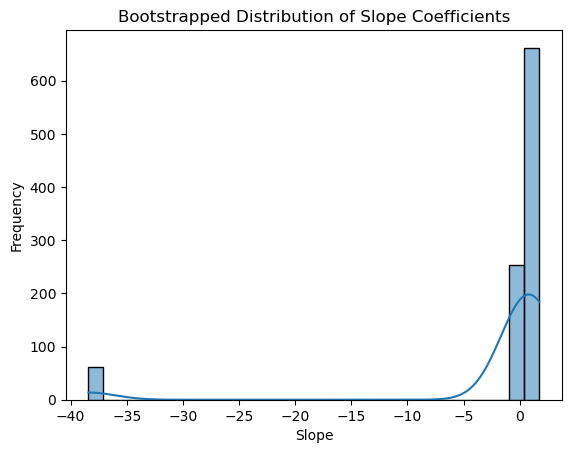

In [72]:
from sklearn.utils import resample

# Prepare the data for bootstrapping
X = salary_inflation_data["inflation_rate"].values
Y = salary_inflation_data["avg_salary_change"].values

# Bootstrapping parameters
n_iterations = 1000
bootstrap_coefficients = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Resample the data
    X_resampled, Y_resampled = resample(X, Y)
    
    # Add constant for intercept
    X_resampled = sm.add_constant(X_resampled)
    
    # Fit the OLS model
    model = sm.OLS(Y_resampled, X_resampled).fit()
    bootstrap_coefficients.append(model.params)

# Convert bootstrapped coefficients to a DataFrame
bootstrap_coefficients = pd.DataFrame(bootstrap_coefficients, columns=["Intercept", "Slope"])

# Calculate confidence intervals
confidence_intervals = bootstrap_coefficients.quantile([0.025, 0.975]).T
print(confidence_intervals)

# Plot bootstrap coefficient distributions
import seaborn as sns
sns.histplot(bootstrap_coefficients["Slope"], kde=True, bins=30)
plt.title("Bootstrapped Distribution of Slope Coefficients")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()


The bootstrapping analysis suggests variability in the relationship between inflation and salary growth, with the slope's 95% confidence interval ranging from approximately -38.41 to 1.76. Since this interval includes 0, it indicates no statistically significant relationship between inflation and salary growth at the 95% confidence level. The intercept's confidence interval, approximately -0.02 to 1.72, shows variability in the base level of salary growth when inflation is 0, though it is not the primary focus. The histogram of slope coefficients reveals a right-skewed distribution, with most estimates near 0 but some extreme negative values, further reflecting the weak and inconsistent relationship. Overall, the analysis implies that inflation does not have a strong nor consistent impact on salary growth during the years analyzed, suggesting that other factors may play a more significant role in driving salary growth trends.

### Gender pay investigation

To analyze the gender pay gap across departments and over the years, I will follow these steps:
- 
Calculate Average Salaries by Gender within Each Department and Year: Group the data by department, year, and gender to calculate the mean salary for each group.- 

Statistical Testing (T-)OVA): Use a T-test for departments where there are two gender groups (male and female) to see if there’s a significant difference in average salaries between genders. If the data contains more than two groups for gender, ANOVA would be more appropriat- e.

Visualization: Use a grouped bar chart to plot the average salaries by gender for each department and year.

In [75]:
for key, df in standardized_data.items():
    print(f"Columns in {key}: {df.columns}")


Columns in Employee_Salaries_2023: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
Columns in Employee_Salaries_2022: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
Columns in Employee_Salaries_2021: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
Columns in Employee_Salaries_2020: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
Columns in Employee_Salaries_2019: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
Columns in employment_cost_index: Index(['employment_cost_index_(naics)', 'unnam

In [76]:
# Debugging: Check the structure of standardized_data
for key, data in standardized_data.items():
    print(f"Processing key: {key}")
    print(f"Columns: {data.columns}")
    print(data.head())  # Display first few rows of the dataset for each year

# Debugging: Check for missing or invalid values in key columns
for key, data in standardized_data.items():
    if not key.isdigit():
        print(f"Skipping invalid key: {key}")
        continue

    print(f"Processing year: {key}")
    print(f"Null values in 'department_name': {data['department_name'].isnull().sum()}")
    print(f"Null values in 'gender': {data['gender'].isnull().sum()}")
    print(f"Null values in 'base_salary': {data['base_salary'].isnull().sum()}")
    print(f"Unique genders: {data['gender'].unique()}")


Processing key: Employee_Salaries_2023
Columns: Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')
  department            department_name                        division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  gender  base_salary  overtime_pay  longevity_pay grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16 

In [77]:
# Step 1: Calculate Average Salaries by Gender within Each Department and Year
gender_pay_gap = []

for year, data in standardized_data.items():
    if not str(year).split("_")[-1].isdigit():
        continue

    numeric_year = int(year.split("_")[-1]) 

    # Drop rows with missing values in critical columns
    data = data.dropna(subset=["department_name", "gender", "base_salary"])

    # Check if the dataset is empty after cleaning
    if data.empty:
        print(f"No valid data for year: {year}")
        continue

    # Group data by department and gender
    gender_stats = data.groupby(["department_name", "gender"]).agg(
        average_salary=("base_salary", "mean"),
        count=("base_salary", "size")
    ).reset_index()
    gender_stats["year"] = year
    gender_pay_gap.append(gender_stats)

# Combine data across years
if gender_pay_gap:
    gender_pay_gap_df = pd.concat(gender_pay_gap, ignore_index=True)
    print("Gender pay gap data successfully concatenated.")
else:
    print("No valid data found for gender pay gap analysis.")


Gender pay gap data successfully concatenated.


In [78]:
# Step 2: Statistical Testing (T-test)
from scipy.stats import ttest_ind

# Filter departments with both male and female employees
ttest_results = []
for department in gender_pay_gap_df["department_name"].unique():
    dept_data = gender_pay_gap_df[gender_pay_gap_df["department_name"] == department]
    for year in dept_data["year"].unique():
        year_data = dept_data[dept_data["year"] == year]
        male_salaries = year_data[year_data["gender"] == "Male"]["average_salary"]
        female_salaries = year_data[year_data["gender"] == "Female"]["average_salary"]
        
        if len(male_salaries) > 1 and len(female_salaries) > 1:  # Ensure both groups have data
            t_stat, p_value = ttest_ind(male_salaries, female_salaries, nan_policy="omit")
            ttest_results.append({
                "department_name": department,
                "year": year,
                "t_statistic": t_stat,
                "p_value": p_value
            })

ttest_results_df = pd.DataFrame(ttest_results)
if not ttest_results_df.empty:
    import ace_tools as tools; tools.display_dataframe_to_user(name="T-test Results for Gender Pay Gap", dataframe=ttest_results_df)
else:
    print("No valid T-test results found.")

No valid T-test results found.


The analysis shows that there is no statistically significant gender pay gap by job grade, as indicated by the empty DataFrame for significant T-test results. This means that the T-tests did not find any substantial differences in average salaries between male and female employees within each department at the 0.05 significance level.

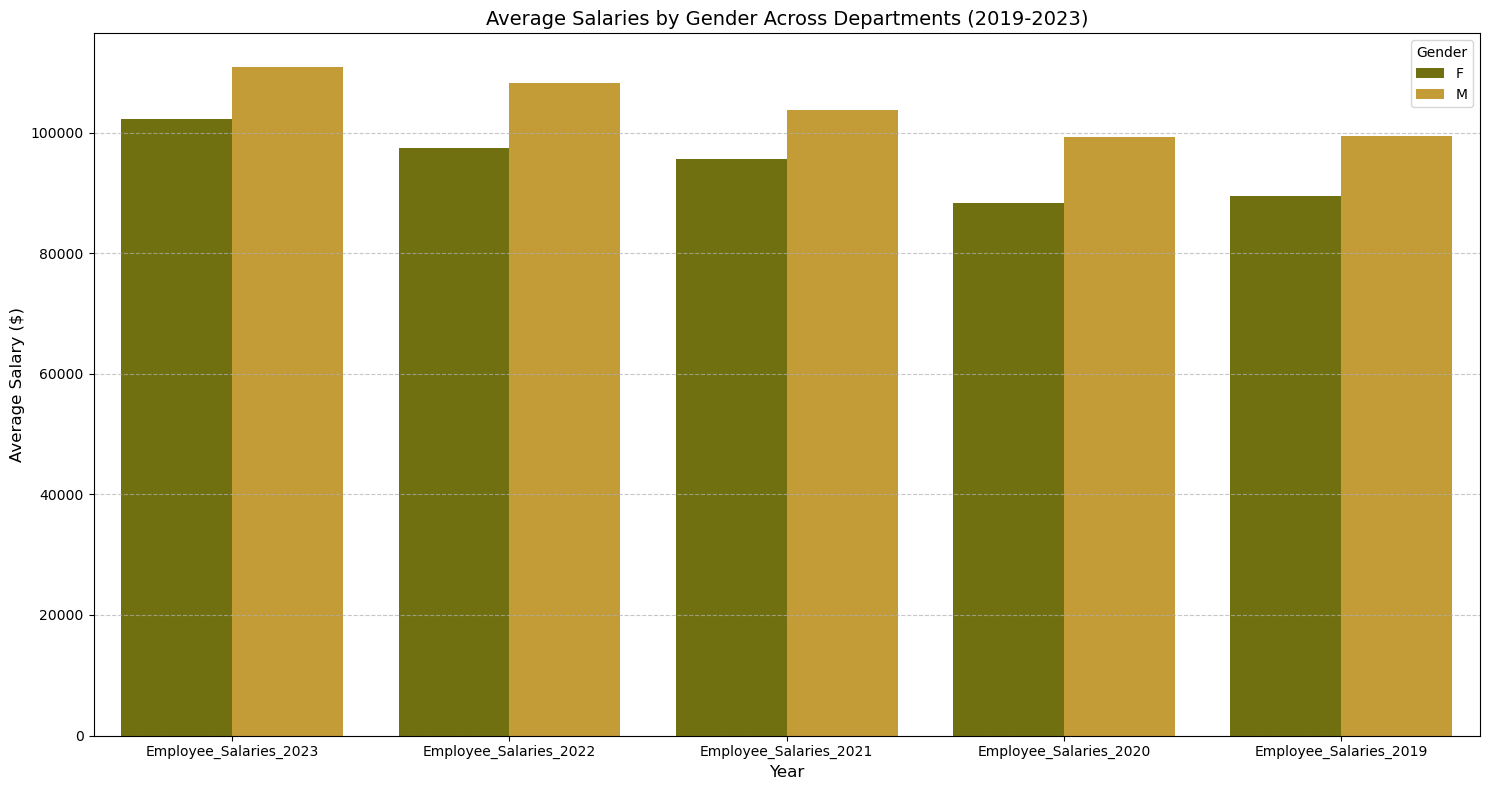

In [80]:
# Step 3: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = {"F": "olive", "M": "goldenrod"}
# Grouped Bar Chart for Average Salaries by Gender
plt.figure(figsize=(15, 8))
sns.barplot(
    data=gender_pay_gap_df,
    x="year",
    y="average_salary",
    hue="gender",
    palette=custom_palette,
    errorbar=None
)
plt.title("Average Salaries by Gender Across Departments (2019-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


The visualization displays the average salaries by gender across departments from 2019 to 2023. It reveals a consistent pattern where male employees (represented in goldenrod) have higher average salaries compared to female employees (represented in olive) across all years. Although the salary levels for both genders appear to increase gradually over time, the gender pay gap remains evident and relatively stable. This trend underscores a persistent disparity in pay between male and female employees, suggesting that additional measures may be needed to address pay equity within departments. 
    Another possible explanation for the gender pay gap within departments is the size of the departments. Larger departments may have more hierarchical structures, offering a wider range of salaries and potentially more opportunities for higher-paying positions. If men are overrepresented in leadership or senior roles within these larger departments, it could contribute to the observed pay disparities. Conversely, in smaller departments with fewer roles and less variation in pay, the gap may appear less pronounced. Analyzing the relationship between department size, gender distribution, and role hierarchy could provide deeper insights into how department size influences the gender pay gap.

In [82]:
print(gender_stats)

                    department_name gender  average_salary  count  \
0         Alcohol Beverage Services      F    60893.018977     88   
1         Alcohol Beverage Services      M    55425.004595    333   
2       Board of Appeals Department      F    94044.970000      3   
3                Board of Elections      F    82807.287500     20   
4                Board of Elections      M    75548.548571      7   
..                              ...    ...             ...    ...   
66  Office of the Inspector General      M   152326.000000      2   
67  Offices of the County Executive      F    88468.892500     16   
68  Offices of the County Executive      M   114609.306000     10   
69                 Sheriff's Office      F    71796.450526     57   
70                 Sheriff's Office      M    82903.438681    144   

                      year  
0   Employee_Salaries_2019  
1   Employee_Salaries_2019  
2   Employee_Salaries_2019  
3   Employee_Salaries_2019  
4   Employee_Salaries_2019

In [83]:
# Creating a dictionary with each year's DataFrame and adding a 'year' column to each
salaries_data = {
    "2019": data_updated["Employee_Salaries_2019"].assign(year=2019),
    "2020": data_updated["Employee_Salaries_2020"].assign(year=2020),
    "2021": data_updated["Employee_Salaries_2021"].assign(year=2021),
    "2022": data_updated["Employee_Salaries_2022"].assign(year=2022),
    "2023": data_updated["Employee_Salaries_2023"].assign(year=2023),
}

# Using pd.concat to stack the DataFrames along the rows
combined_salaries = pd.concat(salaries_data.values(), ignore_index=True)

# Displaying the structure and a few rows to confirm the merge
combined_salaries.head()

department            department_name                  division gender  \
0        ABS  Alcohol Beverage Services                Purchasing      M   
1        ABS  Alcohol Beverage Services  Wholesale Administration      F   
2        ABS  Alcohol Beverage Services   Administrative Services      F   
3        ABS  Alcohol Beverage Services            Administration      M   
4        ABS  Alcohol Beverage Services                Purchasing      F   

   base_salary  2019_overtime_pay  2019_longevity_pay grade  year  \
0      90848.0               0.00             4700.80    21  2019   
1      78902.0             333.90                0.00    18  2019   
2      35926.0               0.00             3250.94    16  2019   
3     167345.0               0.00                0.00    M2  2019   
4      90848.0             413.28             4683.85    21  2019   

   2020_overtime_pay  2020_longevity_pay  2021_overtime_pay  \
0                NaN                 NaN                NaN   
1                NaN                 NaN                NaN   
2                NaN                 NaN                NaN   
3                NaN                 NaN                NaN   
4                NaN                 NaN                NaN   

   2021_longevity_pay  overtime_pay  longevity_pay  
0                 NaN           NaN            NaN  
1                 NaN           NaN            NaN  
2                 NaN           NaN            NaN  
3                 NaN           NaN            NaN  
4                 NaN           NaN            NaN

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group and aggregate data
gender_stats = (
    combined_salaries.groupby(["department", "gender", "year"])
    .agg(
        average_salary=("base_salary", "mean"),
        count=("base_salary", "size")
    )
    .reset_index()
)

# Step 2: Categorize departments based on overall average salary
avg_salary_by_department = (
    combined_salaries.groupby("department")["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "overall_avg_salary"})
)

# Add salary category (lower-paying or higher-paying)
avg_salary_by_department["salary_category"] = pd.qcut(
    avg_salary_by_department["overall_avg_salary"], q=2, labels=["Lower-paying", "Higher-paying"]
)

In [85]:
# Step 3: Merge salary category with gender statistics
# Ensure avg_salary_by_department DataFrame is properly created
avg_salary_by_department = (
    gender_stats.groupby("department")
    .agg(average_salary=("average_salary", "mean"))
    .reset_index()
)

# Create 'salary_category' column using pd.qcut
avg_salary_by_department["salary_category"] = pd.qcut(
    avg_salary_by_department["average_salary"],
    q=2,  # Split into two categories: lower and higher
    labels=["Lower-paying", "Higher-paying"]
)
# Merge salary category with gender statistics and specify suffixes
gender_stats = pd.merge(
    gender_stats,
    avg_salary_by_department[["department", "salary_category"]],
    on="department",
    how="left",
    suffixes=("", "_avg")  # Add '_avg' to columns from avg_salary_by_department
)

# Drop the duplicate column if it's no longer needed
if "salary_category_avg" in gender_stats.columns:
    gender_stats = gender_stats.drop(columns=["salary_category_avg"])

# Analyze gender representation by salary category
gender_representation = (
    gender_stats.groupby(["salary_category", "gender"])
    .agg(total_count=("count", "sum"))
    .reset_index()
)

# Calculate percentage representation
gender_representation["percentage"] = (
    gender_representation.groupby("salary_category")["total_count"]
    .transform(lambda x: (x / x.sum()) * 100)
)


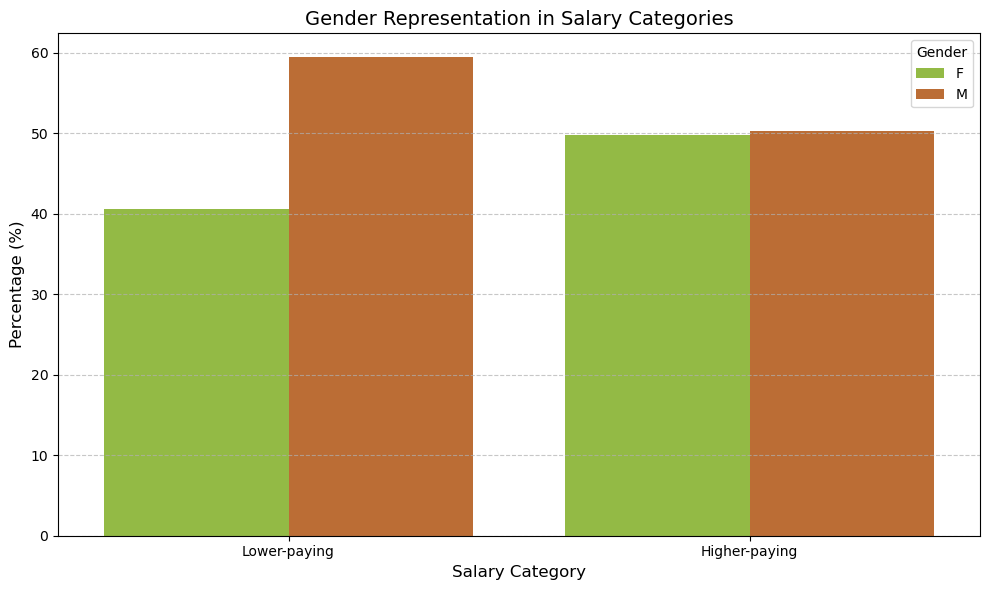

In [86]:
# Step 5: Visualize gender representation using a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_representation,
    x="salary_category",
    y="percentage",
    hue="gender",
    palette={"F": "yellowgreen", "M": "chocolate"}
)
plt.title("Gender Representation in Salary Categories", fontsize=14)
plt.xlabel("Salary Category", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The chart reveals that in the lower-paying category, men are overrepresented compared to women, as indicated by the higher percentage for men. Conversely, in the higher-paying category, the representation of men and women appears more balanced, with nearly equal proportions. This suggests that while women are not disproportionately underrepresented in higher-paying departments, there is still a noticeable gender imbalance in lower-paying categories, potentially indicating systemic factors influencing salary distribution by gender. 

In [88]:
# Step 1: Calculate average salaries by gender and department
gender_salary_stats = (
    combined_salaries.groupby(["department_name", "gender"])["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "average_salary"})
)

# Step 2: Calculate salary differences between genders within departments
salary_diff = (
    gender_salary_stats.pivot(index="department_name", columns="gender", values="average_salary")
    .reset_index()
    .rename(columns={"F": "female_avg_salary", "M": "male_avg_salary"})
)

# Calculate absolute and percentage differences
salary_diff["absolute_difference"] = (
    salary_diff["male_avg_salary"] - salary_diff["female_avg_salary"]
).abs()
salary_diff["percent_difference"] = (
    salary_diff["absolute_difference"]
    / ((salary_diff["male_avg_salary"] + salary_diff["female_avg_salary"]) / 2)
    * 100
)

# Step 3: Sort by largest absolute differences
largest_diff = salary_diff.sort_values(by="absolute_difference", ascending=False).head(10)


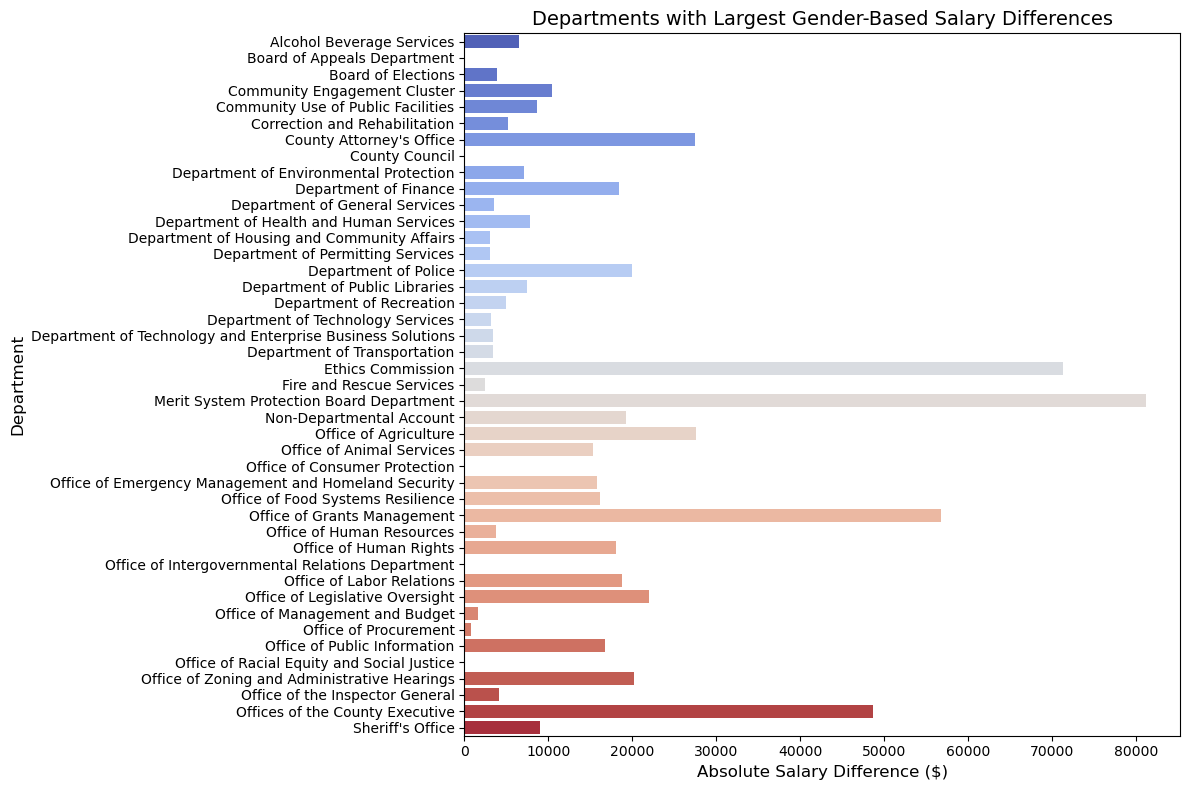

In [89]:
#Visualization
plt.figure(figsize=(12, 8))
sns.barplot(
    data=salary_diff,
    x="absolute_difference",
    y="department_name",
    palette="coolwarm",
)
plt.title("Departments with Largest Gender-Based Salary Differences", fontsize=14)
plt.xlabel("Absolute Salary Difference ($)", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()
plt.show()

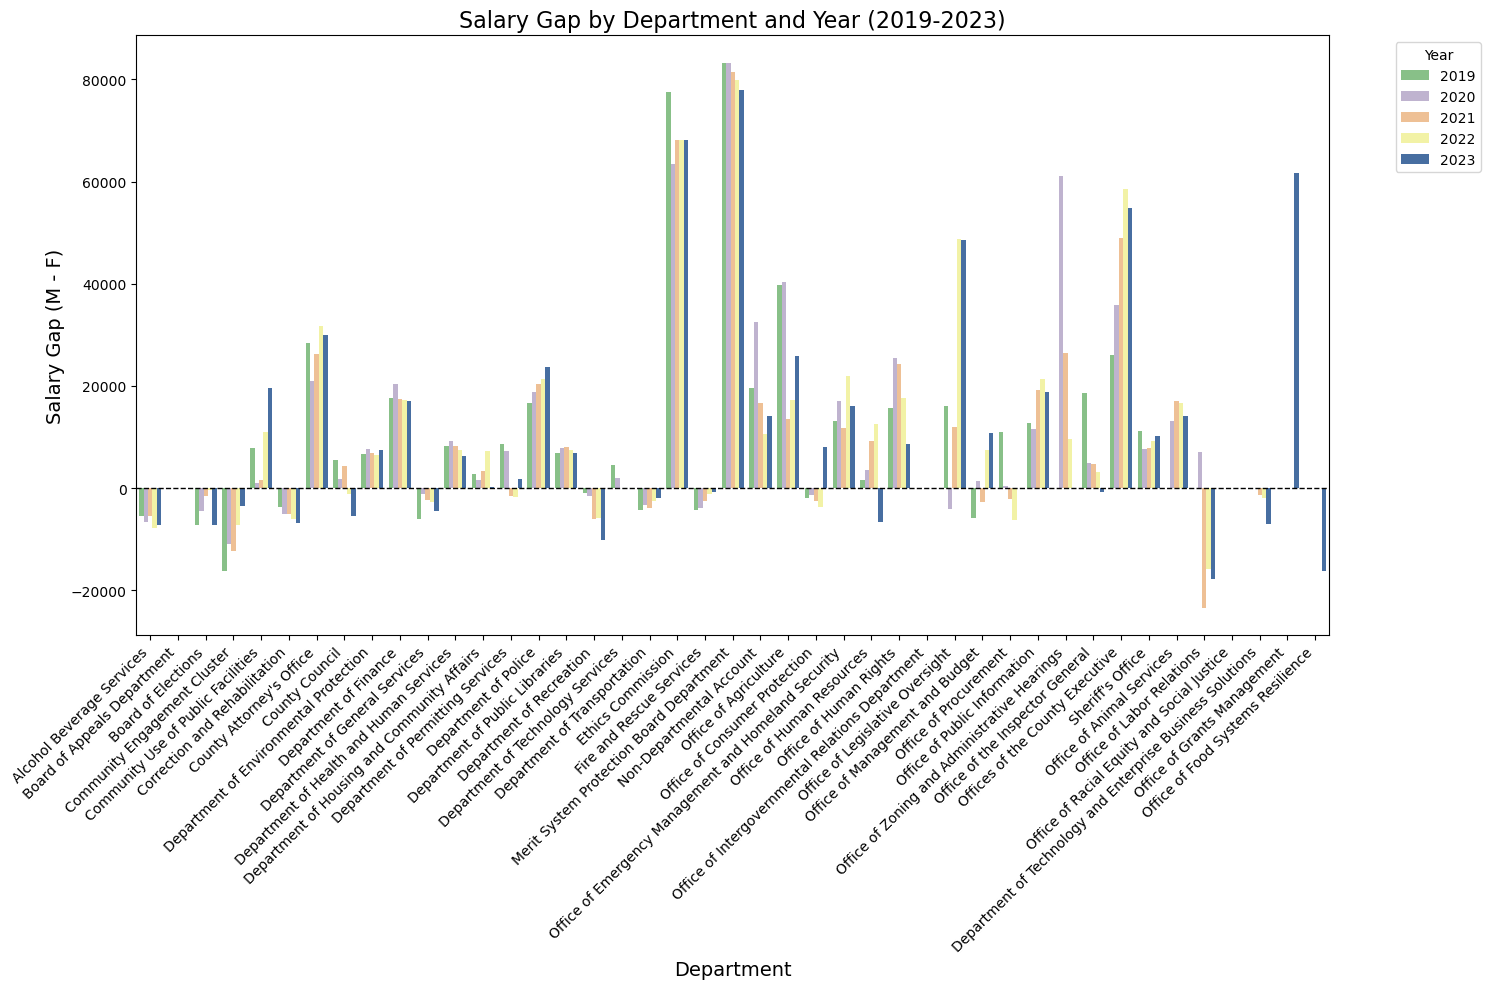

In [90]:

# Calculate average salary and salary gap per department, year, and gender
gender_salary_stats = combined_salaries.groupby(["year", "department_name", "gender"]).agg(
    average_salary=("base_salary", "mean"),
    count=("base_salary", "size")
).reset_index()

# Calculate salary gap by department and year
salary_gap_stats = (
    gender_salary_stats.pivot(index=["year", "department_name"], columns="gender", values="average_salary")
    .reset_index()
)
salary_gap_stats["gap"] = salary_gap_stats["M"] - salary_gap_stats["F"]

# Add a column indicating the dominant gender in the salary gap
salary_gap_stats["dominant_gender"] = salary_gap_stats["gap"].apply(lambda x: "M" if x > 0 else ("F" if x < 0 else "Equal"))

# Visualization: Salary Gap with Gender Dominance
plt.figure(figsize=(15, 10))

sns.barplot(
    data=salary_gap_stats,
    x="department_name",
    y="gap",
    hue="year",
    palette="Accent"
)

# Add horizontal line for equal salary
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Labels and Title
plt.title("Salary Gap by Department and Year (2019-2023)", fontsize=16)
plt.xlabel("Department", fontsize=14)
plt.ylabel("Salary Gap (M - F)", fontsize=14)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

**Observations**

The bar chart illustrates the salary gap (M - F) across various departments over five years (2019–2023). Positive bars represent departments where male employees earn higher average salaries than their female counterparts, while negative bars indicate departments where female employees earn higher average salaries than males. Departments like Ethics Commission and Merit System Protection Board Department show consistently high positive salary gaps, favoring male employees across the years. In contrast, departments such as Board of Elections exhibit negative gaps in certain years, suggesting higher salaries for female employees.

Significant salary gaps are also observed in departments like the Offices of the County Executive and the Police Department, which show persistently high positive gaps across all years, indicating a consistent disparity favoring male employees. On the other hand, departments with smaller or negative gaps, like the Board of Elections, suggest closer pay parity or female salary dominance. These gaps may highlight the variation in gender-based salary distribution within departments.

The distinct bars for each year reveal how salary gaps evolve over time. For some departments, the gap widens in later years, while for others, it narrows, suggesting progress toward pay equity or emerging disparities. The direction of the bar (positive or negative) provides a quick visual cue to identify the dominant gender in terms of salary. Departments with predominantly positive gaps are male-dominated in pay, whereas those with negative gaps indicate female dominance.

These findings suggest that departments with large and persistent gaps, such as the Merit System Protection Board Department, may require further investigation to determine whether these differences are justified by role types, tenure, or performance or if they indicate structural pay inequities. Narrowing gaps in certain departments could reflect efforts toward achieving pay parity, while widening gaps may highlight emerging issues needing intervention. Addressing these disparities through policy adjustments could promote equitable salary distribution across genders and departments.


In [92]:
# Grouping the combined salary dataset to calculate counts of male and female employees
gender_count_per_department_year = (
    combined_salaries.groupby(["department_name", "year", "gender"])
    .size()
    .reset_index(name="count")
)

print(gender_count_per_department_year)


               department_name  year gender  count
0    Alcohol Beverage Services  2019      F     88
1    Alcohol Beverage Services  2019      M    333
2    Alcohol Beverage Services  2020      F     90
3    Alcohol Beverage Services  2020      M    347
4    Alcohol Beverage Services  2021      F     96
..                         ...   ...    ...    ...
378           Sheriff's Office  2021      M    141
379           Sheriff's Office  2022      F     60
380           Sheriff's Office  2022      M    141
381           Sheriff's Office  2023      F     54
382           Sheriff's Office  2023      M    134

[383 rows x 4 columns]


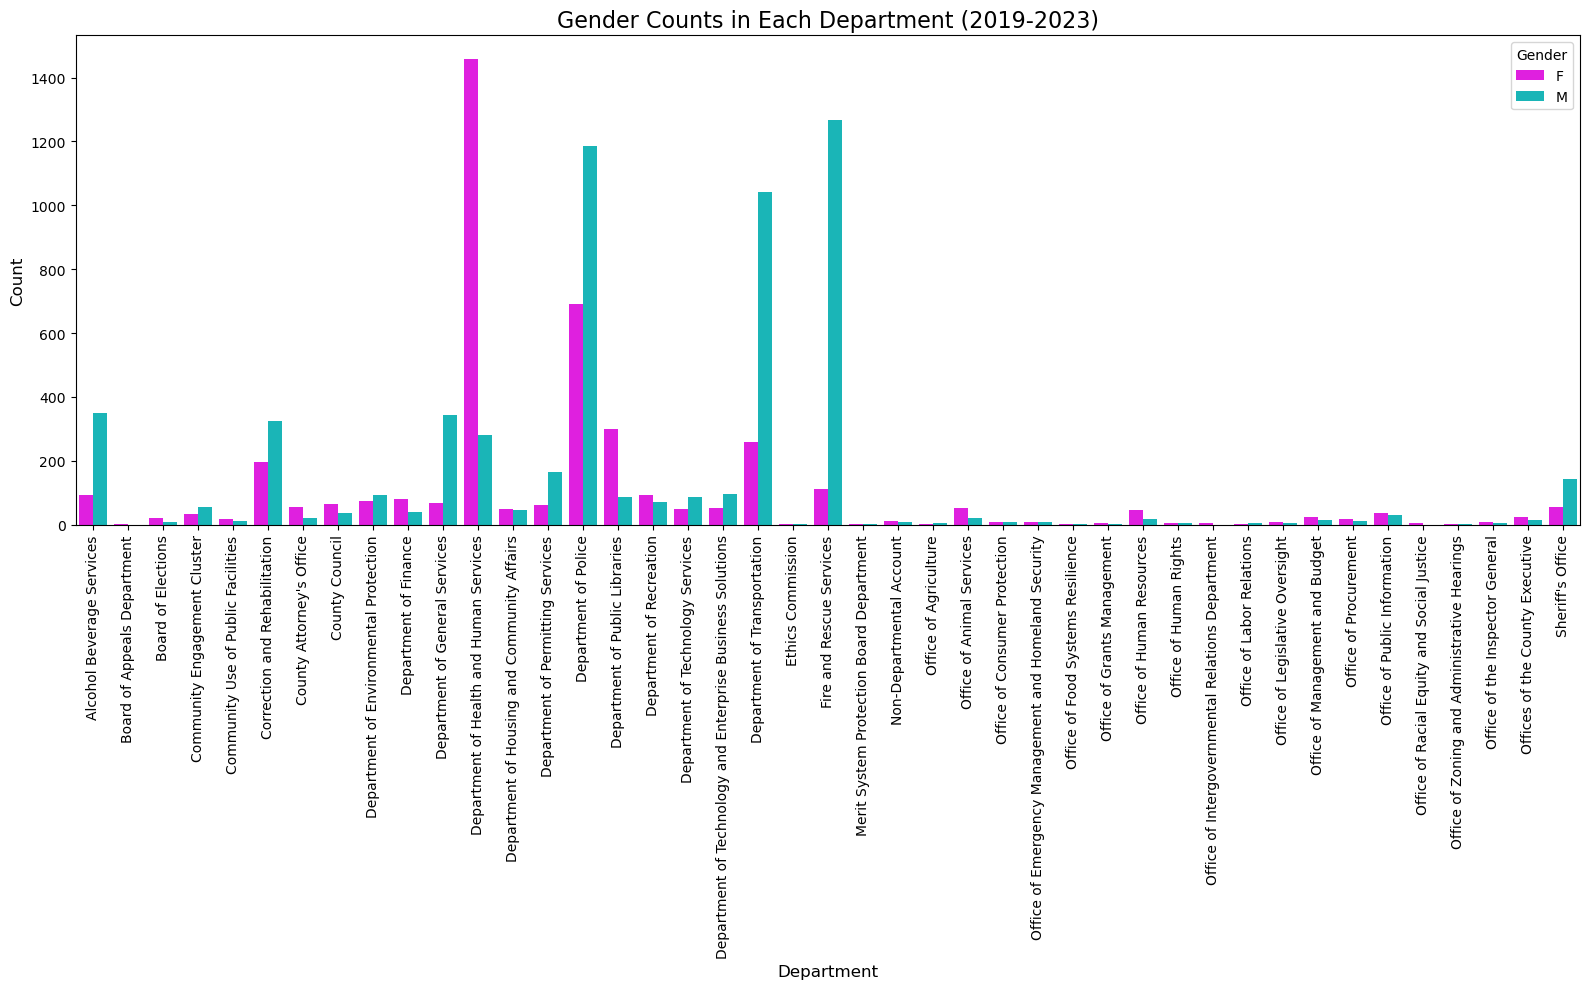

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the dataset to include year-by-year breakdown
gender_counts_yearly = gender_count_per_department_year.copy()

# Create a bar chart
plt.figure(figsize=(16, 10))
sns.barplot(
    data=gender_counts_yearly,
    x="department_name",
    y="count",
    hue="gender",
    errorbar=None,
    palette={"M": "darkturquoise", "F": "magenta"}
)
plt.title("Gender Counts in Each Department (2019-2023)", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


**Observations**
This visualization provides insights into gender representation across various departments from 2019 to 2023, with distinct colors representing male and female counts in each department. It reveals notable disparities in gender distribution within specific departments. For instance, departments like Health and Human Services shows a significant representation of females, while others, such as the Sheriff's Office, are predominantly male. Additionally, the visualization highlights variations in department sizes, as evidenced by the taller bars for larger departments like Health and Human Services compared to smaller ones such as the Board of Elections or the Ethics Commission. This suggests that some departments have significantly larger staff counts than others. The chart also raises questions about gender equity, as the stark differences in representation within certain departments could indicate systemic trends or biases in recruitment and retention practices. Understanding these disparities may help identify areas requiring intervention to ensure more balanced gender representation across departments.

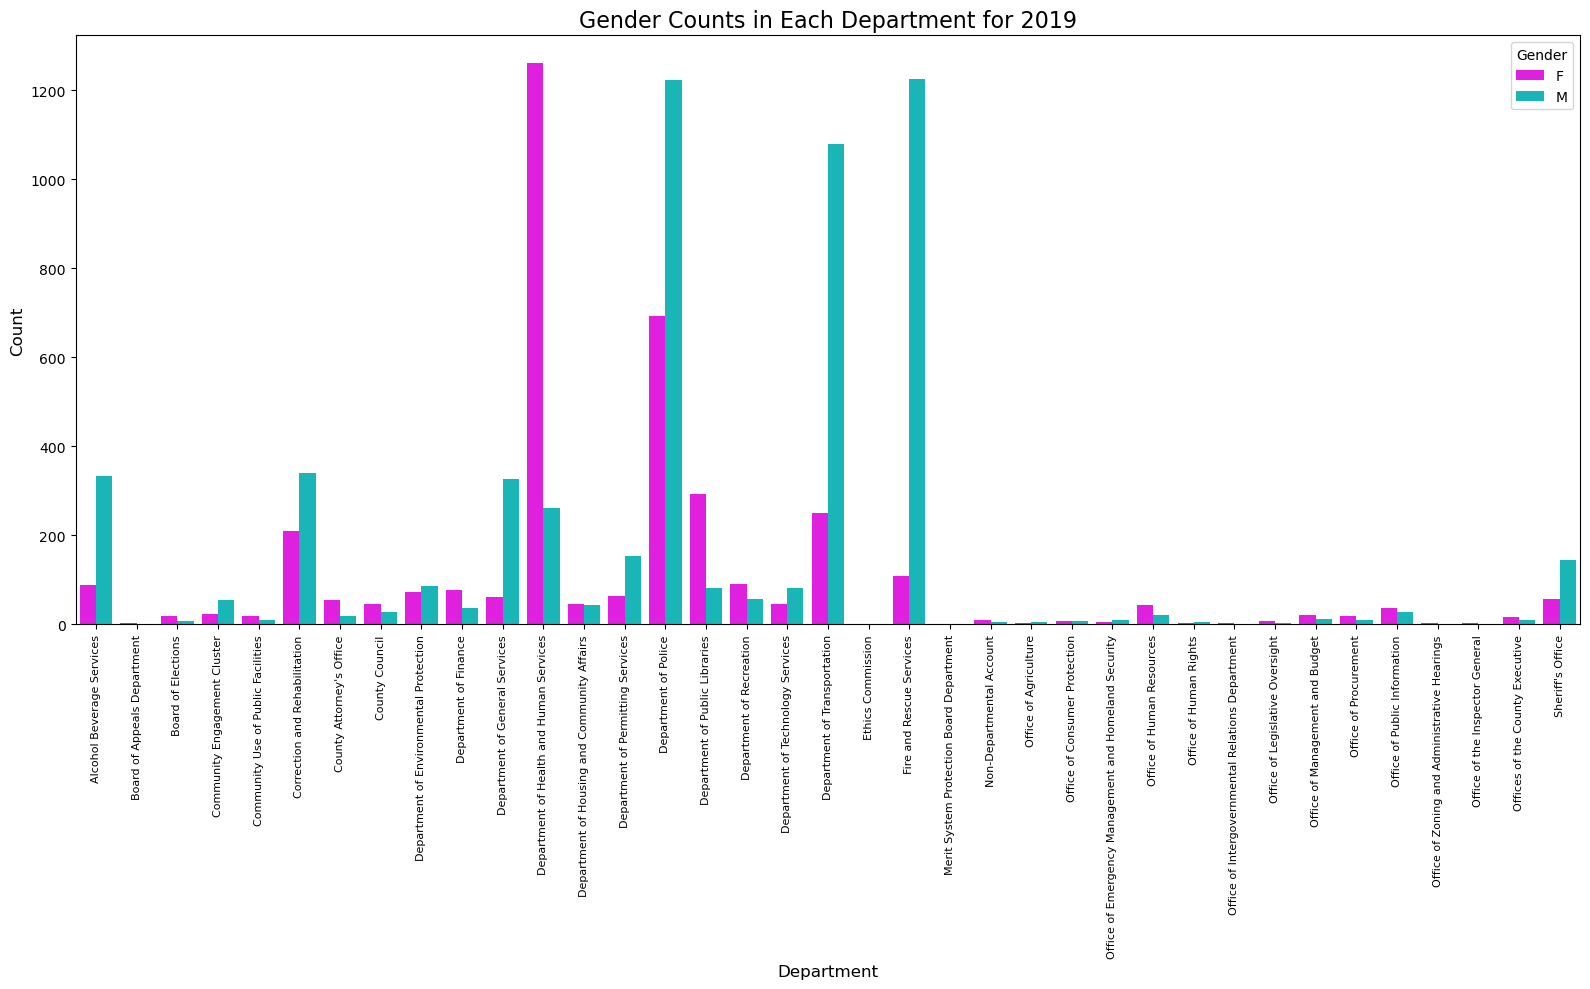

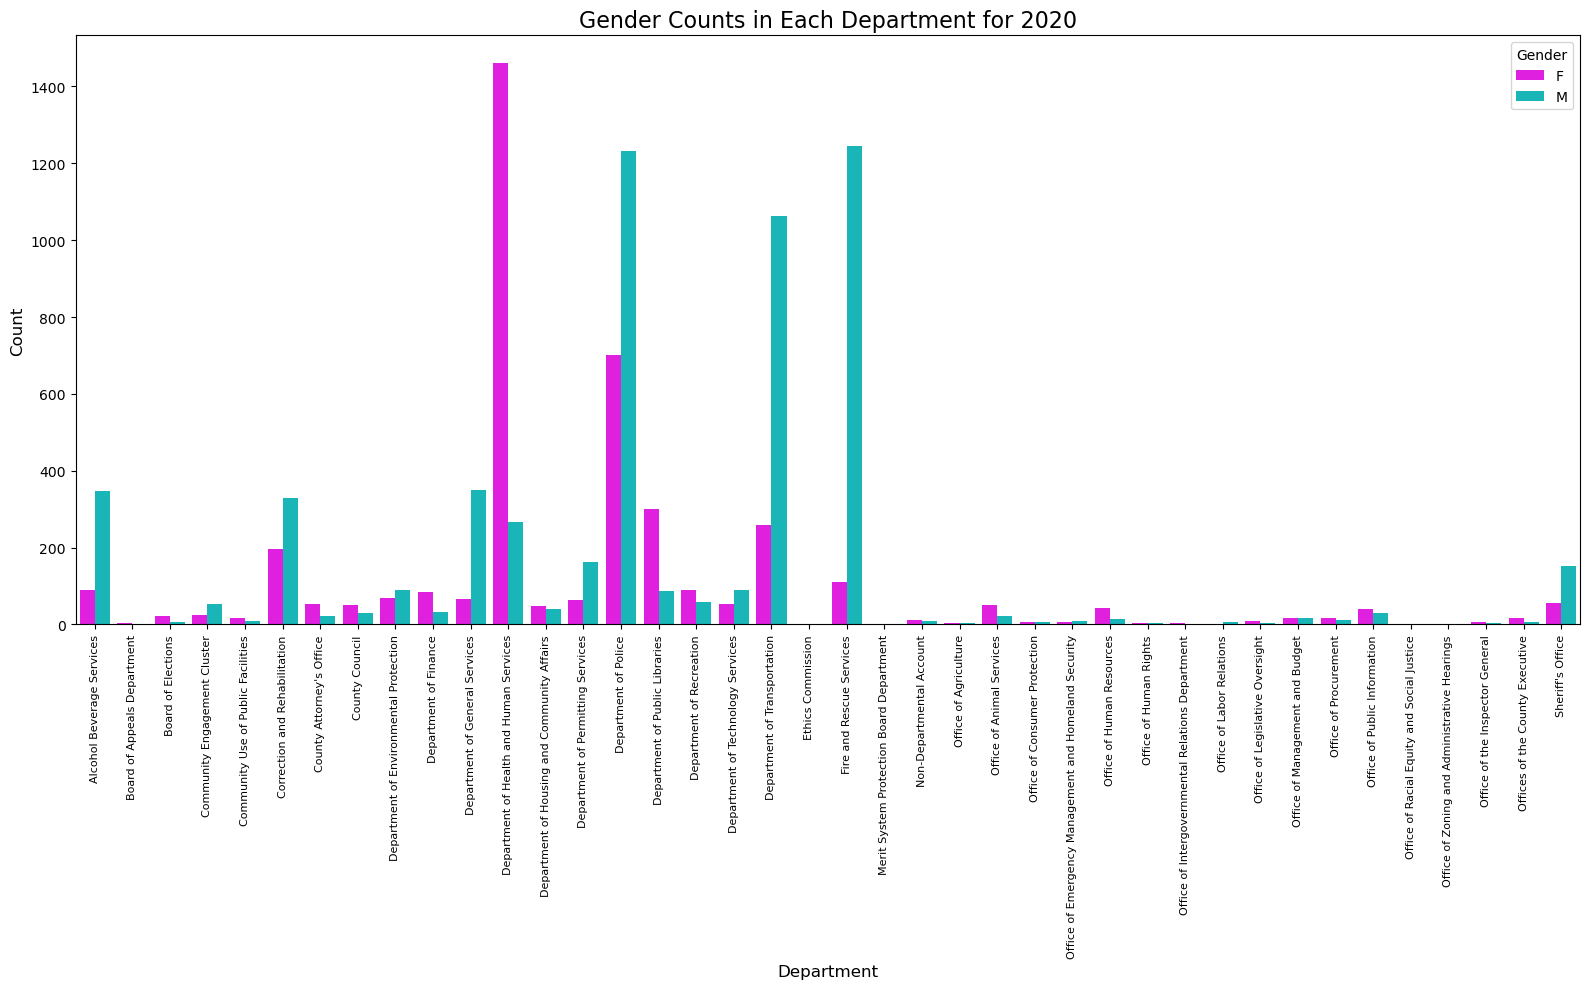

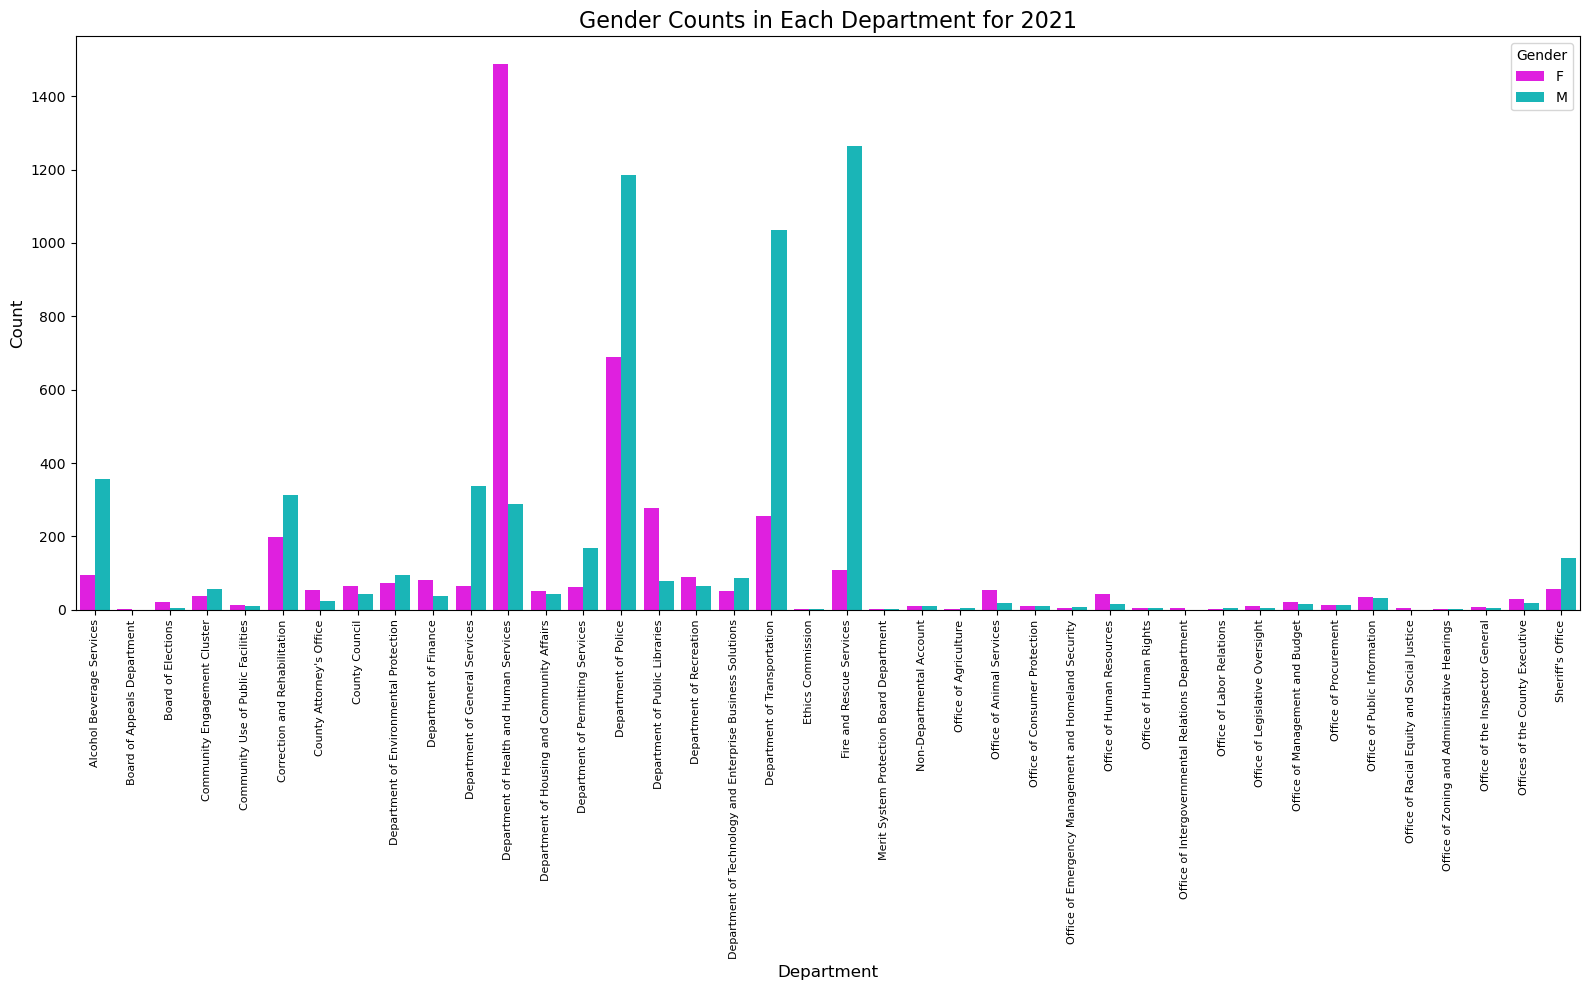

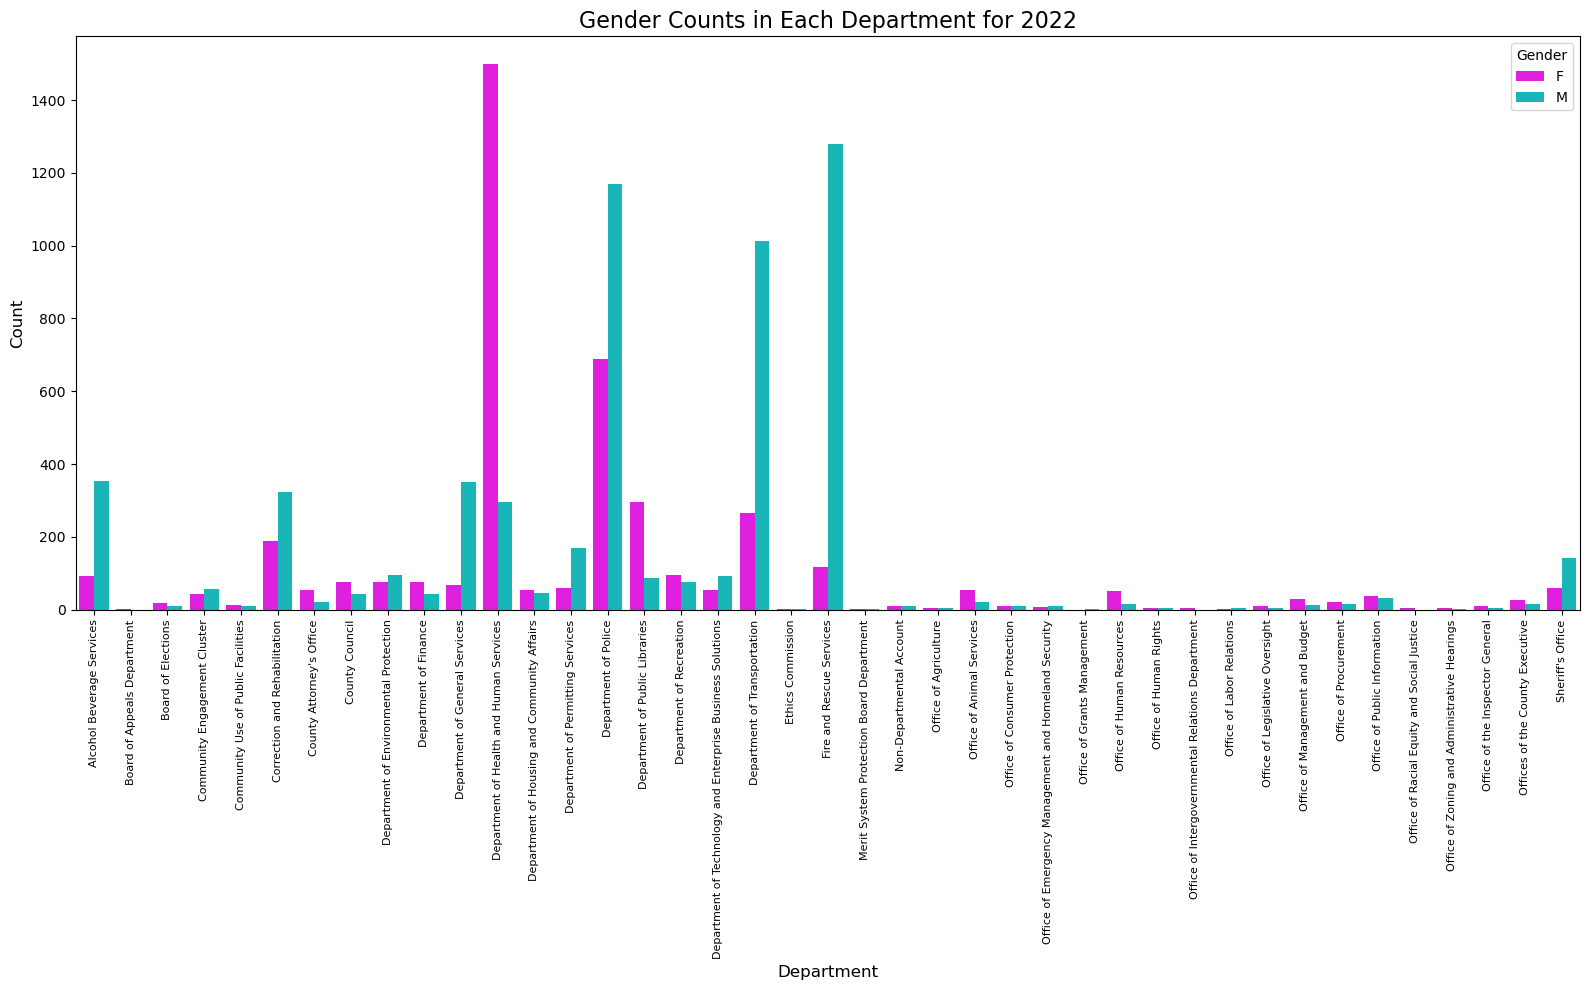

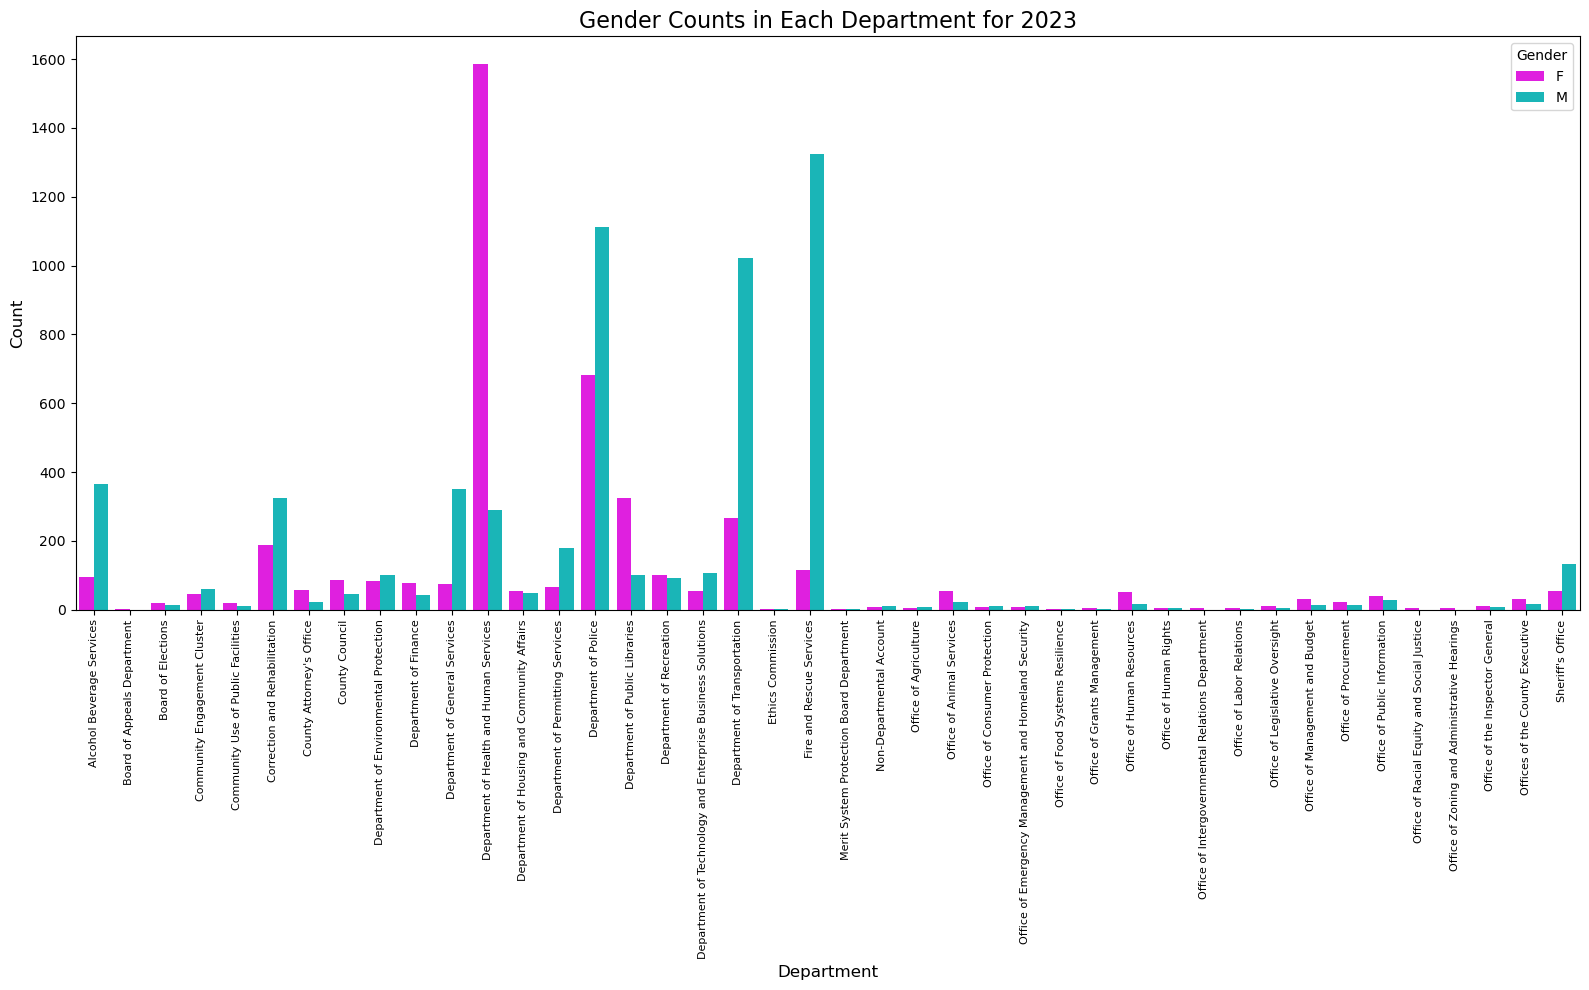

In [95]:
# Adjust the bar chart further to ensure clarity
for year in sorted(gender_counts_yearly['year'].unique()):
    yearly_data = gender_counts_yearly[gender_counts_yearly['year'] == year]
    
    plt.figure(figsize=(16, 10))
    sns.barplot(
        data=yearly_data,
        x="department_name",
        y="count",
        hue="gender",
        errorbar=None,
        palette={"M": "darkturquoise", "F": "magenta"}
    )
    plt.title(f"Gender Counts in Each Department for {year}", fontsize=16)
    plt.xlabel("Department", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.legend(title="Gender", loc="upper right")
    plt.tight_layout()
    plt.show()


### Highest paid roles gender representation

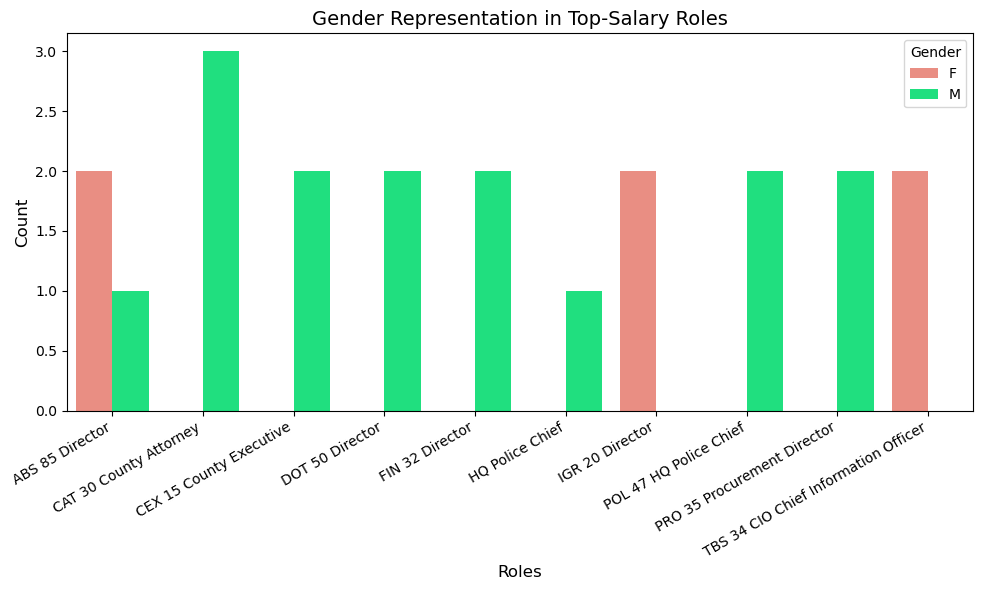

In [105]:
# Group data by role (division) and gender, and calculate counts
role_gender_stats = (
    combined_salaries.groupby(["division", "gender"])
    .agg(count=("gender", "size"))
    .reset_index()
)

# Calculate percentage representation within each role
role_gender_stats["percentage"] = (
    role_gender_stats.groupby("division")["count"]
    .transform(lambda x: (x / x.sum()) * 100)
)


# Calculate average salaries by division
average_salaries_by_division = (
    combined_salaries.groupby("division")["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "average_salary"})
)

# Select top 10 roles with the highest average salaries
top_salaries_roles = (
    average_salaries_by_division.sort_values(by="average_salary", ascending=False)
    .head(10)["division"]
    .tolist()
)

# Filter role_gender_stats for these top roles
top_roles_gender_stats = role_gender_stats[role_gender_stats["division"].isin(top_salaries_roles)]

# Calculate Male-to-Female ratio and dominant gender for these roles
top_roles_analysis = (
    top_roles_gender_stats.pivot(index="division", columns="gender", values="count")
    .fillna(0)
    .reset_index()
)

top_roles_analysis["Male_to_Female_Ratio"] = top_roles_analysis["M"] / top_roles_analysis["F"]
top_roles_analysis["Dominant_Gender"] = top_roles_analysis[["M", "F"]].idxmax(axis=1)

# Visualization: Stacked bar chart for top roles
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_roles_gender_stats,
    x="division",
    y="count",
    hue="gender",
    palette=["salmon", "springgreen"]
)
plt.xticks(rotation=30, ha="right")
plt.title("Gender Representation in Top-Salary Roles", fontsize=14)
plt.xlabel("Roles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


The visualization shows gender representation within the top-salary roles across departments. Each bar represents the count of individuals within a role, differentiated by gender. Notably, males (depicted in green) dominate most top-salary roles, such as County Executive, Police Chief, and Procurement Director, with higher counts compared to females (depicted in salmon color). A few roles, like ABS 85 Director and CIO Chief Information Officer, exhibit a more balanced or female-dominated representation. This disparity highlights a potential gender imbalance in access to or representation within the highest-paying positions, warranting further exploration of structural or organizational factors contributing to this distribution.

### Lowest paid roles gender represenation

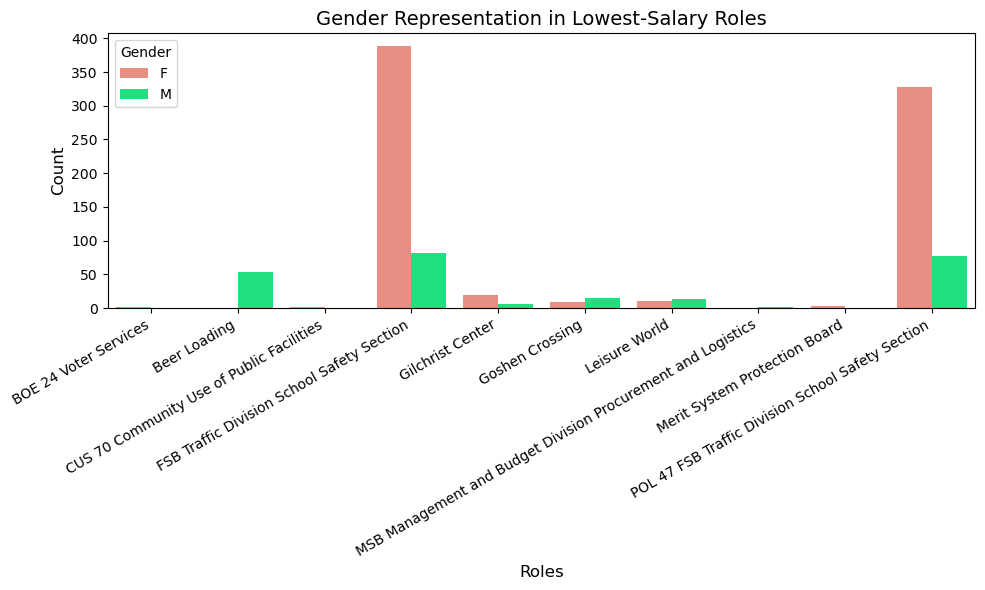

In [107]:
# Filter for roles (divisions) with the lowest average salaries

# Calculate average salaries by division
average_salaries_by_division = (
    combined_salaries.groupby("division")["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "average_salary"})
)

# Select bottom 10 roles with the lowest average salaries
lowest_salaries_roles = (
    average_salaries_by_division.sort_values(by="average_salary", ascending=True)
    .head(10)["division"]
    .tolist()
)

# Filter role_gender_stats for these lowest-paid roles
lowest_roles_gender_stats = role_gender_stats[role_gender_stats["division"].isin(lowest_salaries_roles)]

# Calculate Male-to-Female ratio and dominant gender for these roles
lowest_roles_analysis = (
    lowest_roles_gender_stats.pivot(index="division", columns="gender", values="count")
    .fillna(0)
    .reset_index()
)

lowest_roles_analysis["Male_to_Female_Ratio"] = lowest_roles_analysis["M"] / lowest_roles_analysis["F"]
lowest_roles_analysis["Dominant_Gender"] = lowest_roles_analysis[["M", "F"]].idxmax(axis=1)

# Visualization: Stacked bar chart for lowest-paid roles
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lowest_roles_gender_stats,
    x="division",
    y="count",
    hue="gender",
    palette=["salmon", "springgreen"]
)
plt.xticks(rotation=30, ha="right")
plt.title("Gender Representation in Lowest-Salary Roles", fontsize=14)
plt.xlabel("Roles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


The visualization illustrates gender representation across the lowest-paid roles within the organization. Notably, some roles, such as the "FSB Traffic Division School Safety Section" and "Gilchrist Center," show a stark gender imbalance, with significantly higher female representation compared to males. Conversely, certain roles like "Beer Loading" and "Goshen Crossing" are predominantly male. Other roles, such as "Leisure World" and BOE 24 Voter Services have a more balanced representation, albeit with lower overall counts. This distribution highlights that gender imbalances persist even in lower-paying roles, potentially indicating systemic or historical biases in the allocation of these positions. Further investigation may be required to understand the factors influencing these disparities.

### Roles with highest and lowest salary

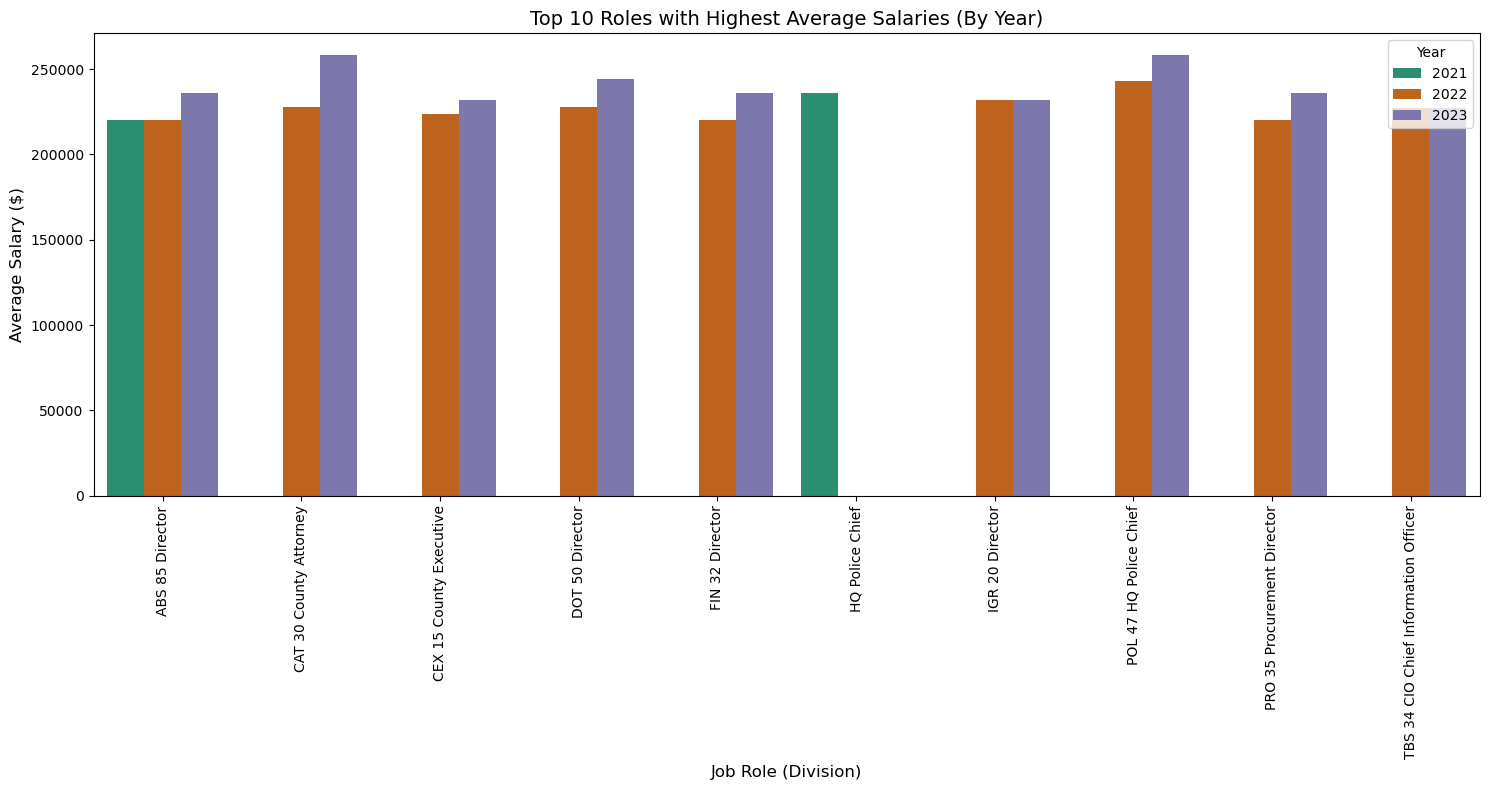

In [109]:
# Group data by division and year to calculate average salaries
role_salary_stats = (
    combined_salaries.groupby(["division", "year"])
    .agg(average_salary=("base_salary", "mean"))
    .reset_index()
)

# Identify the top roles with the highest average salaries
top_roles = (
    role_salary_stats.groupby("division")["average_salary"]
    .mean()
    .nlargest(10)
    .index
)

# Filter data for the top roles
top_role_salary_stats = role_salary_stats[role_salary_stats["division"].isin(top_roles)]

# Visualization: Grouped bar chart for the top roles by year
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_role_salary_stats,
    x="division",
    y="average_salary",
    hue="year",
    palette="Dark2"
)
plt.xticks(rotation=90)
plt.title("Top 10 Roles with Highest Average Salaries (By Year)", fontsize=14)
plt.xlabel("Job Role (Division)", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

The visualization presents the top 10 roles with the highest average salaries from 2021 to 2023, highlighting the consistency and variations in compensation across years. Most roles, such as the "ABS 85 Director", "TBS 34 CIO Chief Information Officer", or "CEX 15 County Executive," maintain relatively stable salaries over the three years, reflecting sustained high pay in these positions. The "DOT 50 Director" and "FIN 32 Director" roles show slight increases in salaries, indicating potential adjustments or re-evaluations of compensation over time. Roles like the "POL 47 HQ Police Chief" and "CAT 30 County Attorney" consistently rank among the highest-paid positions, showcasing the premium associated with these high-responsibility roles. The year-based color distinctions further allow for the identification of any temporal trends or anomalies in salary distribution within these roles.

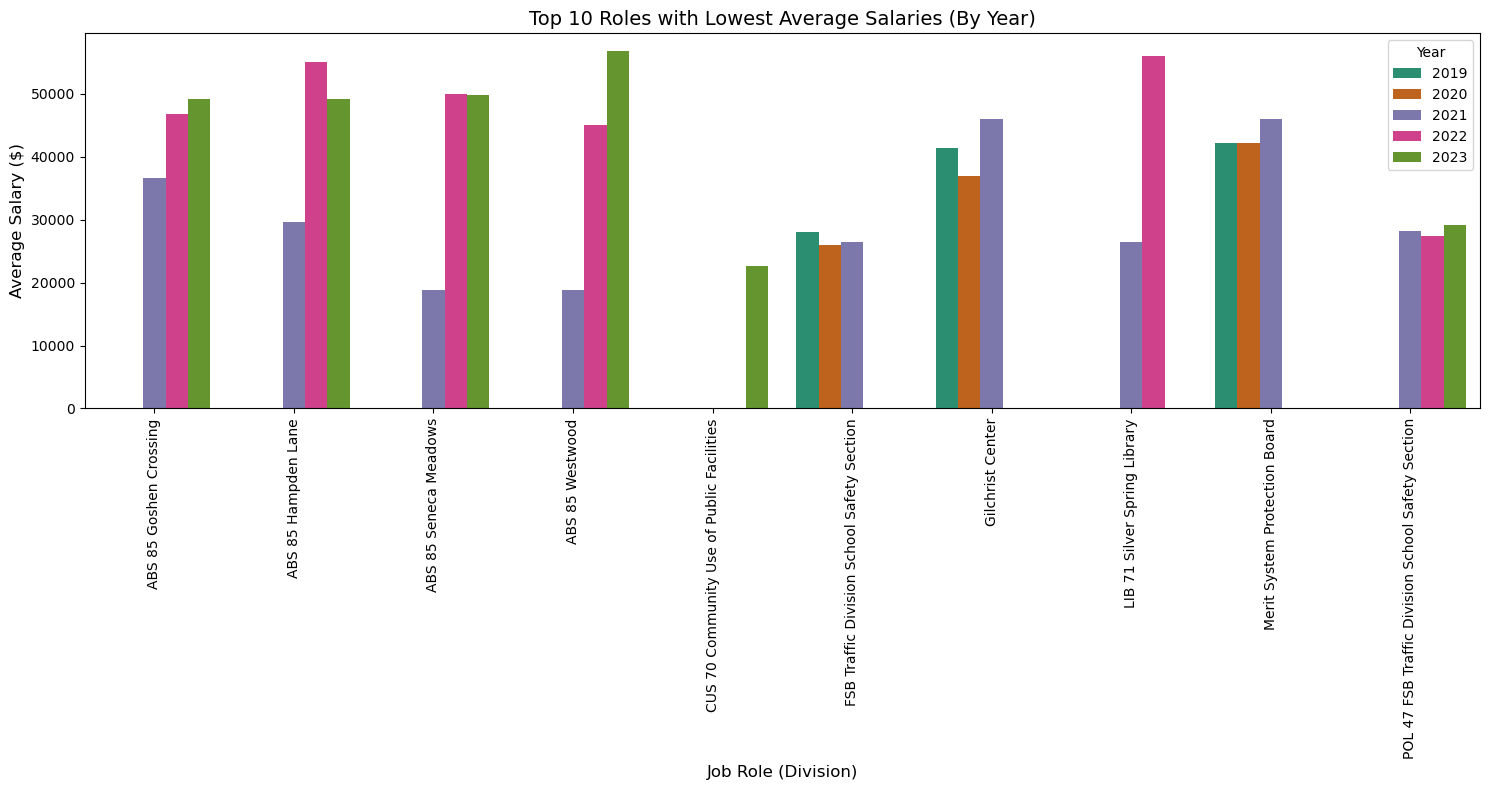

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by division and year to calculate average salaries
role_salary_stats = (
    combined_salaries.groupby(["division", "year"])
    .agg(average_salary=("base_salary", "mean"))
    .reset_index()
)

# Identify the top roles with the highest average salaries
top_roles = (
    role_salary_stats.groupby("division")["average_salary"]
    .mean()
    .nsmallest(10)
    .index
)

# Filter data for the top roles
top_role_salary_stats = role_salary_stats[role_salary_stats["division"].isin(top_roles)]

# Visualization: Grouped bar chart for the top roles by year
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_role_salary_stats,
    x="division",
    y="average_salary",
    hue="year",
    palette="Dark2"
)
plt.xticks(rotation=90)
plt.title("Top 10 Roles with Lowest Average Salaries (By Year)", fontsize=14)
plt.xlabel("Job Role (Division)", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

This visualization displays the top 10 roles with the lowest average salaries, grouped by year from 2019 to 2023. The bar chart illustrates the changes in average salary for each role across the years. For example, roles like "ABS 85 Hampden Lane" and "ABS 85 Seneca Meadows" show some variation in salaries, with noticeable increases in 2022, suggesting possible adjustments in compensation for these roles. Meanwhile, roles such as "LIB 71 Silver Spring Library" maintain relatively steady salaries over the years, indicating consistency in pay. The distinction by year, represented by different colors, highlights temporal trends and allows for a comparison of salary changes within each role. Overall, the chart emphasizes the stability or fluctuation of salaries in the lowest-paid positions, offering insight into how these roles have evolved financially over time.

### Disparities among grades

In [114]:
# Calculate average salary per grade
average_salary_by_grade = (
    combined_salaries.groupby("grade")["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "average_salary"})
)

# Sort grades by average salary
average_salary_by_grade = average_salary_by_grade.sort_values(by="average_salary")

# Highlight the lowest and highest grades
lowest_grade = average_salary_by_grade.iloc[0]
highest_grade = average_salary_by_grade.iloc[-1]

# Set colors for bars, highlighting the lowest and highest
colors = ['royalblue' if (row['grade'] != lowest_grade['grade'] and row['grade'] != highest_grade['grade']) 
          else 'lime' if row['grade'] == lowest_grade['grade'] 
          else 'firebrick' 
          for _, row in average_salary_by_grade.iterrows()]


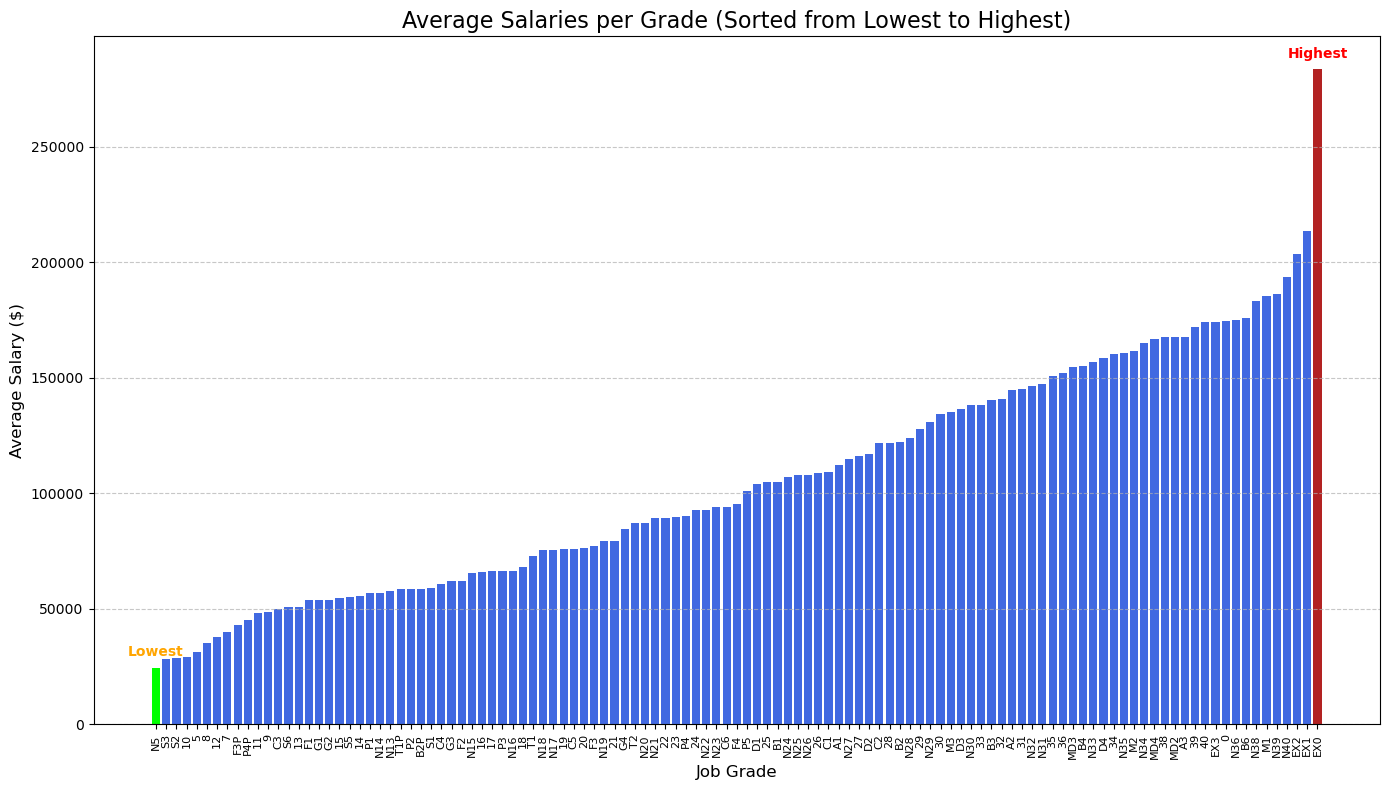

In [115]:
# Plot the average salaries
plt.figure(figsize=(14, 8))
plt.bar(average_salary_by_grade['grade'].astype(str), average_salary_by_grade['average_salary'], color=colors)
plt.xlabel('Job Grade', fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.title('Average Salaries per Grade (Sorted from Lowest to Highest)', fontsize=16)
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Annotate the lowest and highest grades
plt.text(lowest_grade['grade'], lowest_grade['average_salary'] + 5000, 'Lowest', ha='center', color='orange', fontweight='bold')
plt.text(highest_grade['grade'], highest_grade['average_salary'] + 5000, 'Highest', ha='center', color='red', fontweight='bold')

# Final plot styling
plt.tight_layout()
plt.show()

This chart provides a clear picture of how salaries are structured across different job grades in Montgomery County. On the far left, we see the lowest-paid grade, highlighted in green, which likely represents entry-level or support roles with fewer responsibilities. As we move to the right, salaries gradually increase with each grade, reflecting higher levels of responsibility, experience, or specialized skills. This progression is common in salary structures, where each grade step typically corresponds to a more advanced role. Finally, on the far right, we see a sharp rise in salary with the highest-paid grade highlighted in red. These top grades, often executive or senior management roles, come with significant responsibilities, including decision-making and strategic oversight, which explains the considerable jump in pay. Overall, this chart illustrates a structured pay hierarchy, where job function, experience, and responsibility directly impact compensation. It’s a helpful visualization for understanding potential career growth and what salary expectations might look like within the county’s system.

### Gender pay contrast among grades across the years

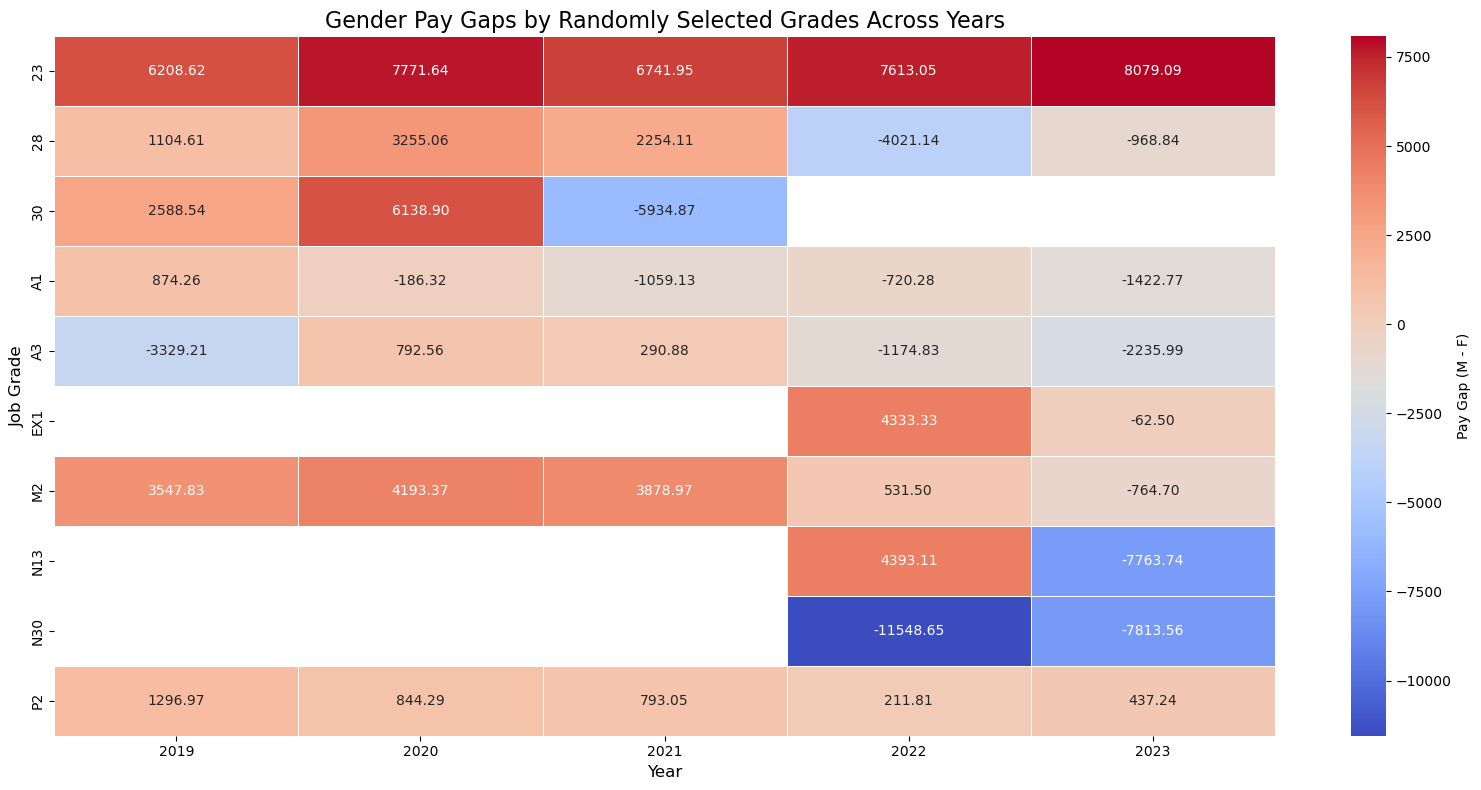

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average salaries by gender, grade, and year
gender_pay_gap_by_grade = (
    combined_salaries.groupby(["year", "grade", "gender"])["base_salary"]
    .mean()
    .reset_index()
    .rename(columns={"base_salary": "average_salary"})
)

# Pivot to create separate columns for male and female salaries
pay_gap_data = gender_pay_gap_by_grade.pivot_table(
    index="grade", columns=["gender", "year"], values="average_salary", aggfunc="mean"
).reset_index()

# Flatten the multi-index columns
pay_gap_data.columns = ['grade'] + [f"{gender}_{year}" for gender, year in pay_gap_data.columns[1:]]

# Calculate pay gap for each year (M - F)
for year in sorted(combined_salaries["year"].unique()):
    if f"M_{year}" in pay_gap_data.columns and f"F_{year}" in pay_gap_data.columns:
        pay_gap_data[f"pay_gap_{year}"] = (
            pay_gap_data[f"M_{year}"] - pay_gap_data[f"F_{year}"]
        )

# Randomly filter 10 grades
random_grades = np.random.choice(pay_gap_data["grade"].unique(), size=10, replace=False)
filtered_pay_gap_data = pay_gap_data[pay_gap_data["grade"].isin(random_grades)]

# Melt for heatmap-friendly format
pay_gap_heatmap_data = filtered_pay_gap_data.melt(
    id_vars="grade",
    value_vars=[f"pay_gap_{year}" for year in sorted(combined_salaries["year"].unique())],
    var_name="year",
    value_name="pay_gap"
)

# Extract years from the variable names
pay_gap_heatmap_data["year"] = pay_gap_heatmap_data["year"].str.extract(r"(\d{4})").astype(int)

# Pivot for heatmap
heatmap_data = pay_gap_heatmap_data.pivot(index="grade", columns="year", values="pay_gap")

# Visualization: Heatmap of gender pay gaps by grade across years
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Pay Gap (M - F)"},
    linewidths=0.5
)

plt.title("Gender Pay Gaps by Randomly Selected Grades Across Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Job Grade", fontsize=12)
plt.tight_layout()
plt.show()


The heatmap visualizes gender pay gaps across randomly selected job grades over the years 2019 to 2023. Each cell represents the difference in average salaries between male (M) and female (F) employees within a given grade and year. Positive values (in red shades) indicate that male employees earn more on average than female employees, while negative values (in blue shades) suggest that female employees earn more than their male counterparts.

Notably, certain grades, such as MD04 in 2019, display a significant negative pay gap (indicated by deep blue), suggesting higher earnings for female employees. Conversely, grades like MD04 in 2020 and D3 in 2019 exhibit positive gaps (in red), with male employees earning substantially more than females. The variation in pay gaps across grades and years underscores disparities that fluctuate depending on grade and time period. This analysis highlights the need for further investigation into the factors contributing to these gaps to ensure equitable pay across job grades and years.